# <p style="text-align:center;">**BIKE SHARING**</p>
### <p style="text-align:center;">**Capstone Modul 3**</p>
----
<p style="text-align:center;">Irma Lusyana</p>


# Business Problem Understanding
**Context**

Versi modern dari `Bike Sharing` kini memfasilitasi pengguna dapat menyewa sepeda di satu lokasi dan mengembalikannya di lokasi lain. Pengguna sistem ini juga tidak harus mendaftar keanggotaan, sehingga siapapun dapat mengakses dan menikmati layanannya. Pada 2012, ada lebih dari 500 program Bike Sharing di seluruh dunia yang mencakup lebih dari 500 ribu sepeda.

Pasar Bike Sharing di dunia melesat hingga $1.6 miliar atau Rp24 triliun (kurs Rp15.000) pada tahun 2016 atau hampir 3 kali lipat dibandingkan 2013. Dua alasan perkembangan terjadi adalah kebutuhan masyarakat mengatasi kemacetan dan kebutuhan para perusahaan teknologi yang bersedia menginvestasikan nilai besar untuk memahami data tingkah laku user. Secara umum, sistem Bike Sharing sangat diminati karena perannya yang penting meningkatkan mobilitas, mengurangi emisi karbon, dan mempromosikan gaya hidup sehat.

Sistem Bike Sharing yang sudah terdigitalisasi saat ini sudah mengumpulkan data yang berkaitan dengan perilaku pengguna, sehingga dapat dimanfaatkan para analis untuk memprediksikan jumlah pengguna di masa yang akan datang.

[Ledakan Bisnis Bike-Sharing Cina, Bagaimana Kansnya di Indonesia?](https://tirto.id/ledakan-bisnis-bike-sharing-cina-bagaimana-kansnya-di-indonesia-cJh5)

**Problem Statement**

- Perencanaan yang buruk dan persaingan yang ketat menciptakan kekacauan logistic di beberapa daerah
- Industri yang gagal akan menciptakan ‘kuburan sepeda’ menciptakan limbah industry baru

China (2018) mengalami over supply sehingga inventaris begitu banyak tidak terawat dan didayagunakan dengan baik. ["The Vast Bicycle Graveyards of China"](https://www.bbc.com/future/article/20210112-the-vast-bicycle-graveyards-of-china)

**Goals:** 

- Mendefenisikan perilaku penyewa Bike Sharing atas fitur yang tersedia
- Membandingkan beberapa model regresi untuk memperoleh nilai error yang rendah dalam memprediksi jumlah penyewa
- Mengerti tentang model regresi dan memilih model terbaik dalam memprediksi jumlah optimal penyewa sepeda
- Mampu memproyeksikan keuntungan bisnis jika menggunakan machine learning, dibandingkan dengan rule based
- Membuat rekomendasi atas hasil analisa

Rule based sebagai berikut:

- Hari bukan libur sebagai hari kerja yang jumlah penyewanya lebih banyak
    - Senin - Jumat : Hari kerja (cenderung meningkat)
    - Sabtu - Minggu : Akhir Pekan (cenderung berkurang)
- Pengkategorian waktu dibagi menjadi 3, yaitu:
    - Pagi : 06.00 - 12.00 (banyak penyewa)
    - Siang : >12.00 - 18.00 (lebih banyak penyewa)
    - Malam : >18.00 dan <06.00 (sedikit penyewa)
- Suhu semakin tinggi (banyak penyewa)

[potensi penerapan bike sharing](https://repo.itera.ac.id/assets/file_upload/SB2102020004/22116115_20_105950.pdf)

**Analytic Approach:** 

Analisa dilakukan terhadap data dengan menemukan pola dari fitur-fitur yang tersedia, serta bagaimana tiap fitur tersebut mempengaruhi jumlah ketersediaan unit sepeda. Selanjutnya, akan dibangun suatu **model regresi** yang akan membantu dalam menentukan jumlah unit sepeda yang perlu disediakan sehingga berguna untuk optimisasi infrastruktur dan efisiensi biaya operasional.

**Evaluation Metric**

Metric evaluation yang digunakan dalam model regresi guna memprediksi jumlah total penyewaan sepeda:

>- Mean Absolute Error (MAE): Mengukur rata-rata kesalahan absolut antara prediksi dan nilai aktual. Memberikan gambaran sederhana tentang kesalahan rata-rata.
>- Mean Squared Error (MSE): Menghitung rata-rata dari kuadrat kesalahan, memberikan penalti yang lebih besar untuk kesalahan besar.
>- Root Mean Squared Error (RMSE): Akar dari MSE, memberikan hasil dalam unit yang sama dengan target, sehingga lebih mudah diinterpretasikan.
>- Mean Absolute Percentage Error (MAPE): Mengukur kesalahan prediksi dalam persentase, berguna untuk mengetahui seberapa jauh prediksi dari nilai aktual dalam bentuk relatif.
>- R-squared (R²): Mengukur seberapa baik model menjelaskan variasi dalam data. Nilai mendekati 1 menunjukkan model yang baik.

Hasil akhir akan dipilih melalui perbandingan RMSE terbaik karena RMSE memberikan penalti lebih besar daripada kesalahan kecil seperti MSE, tetapi tidak terlalu besar seperti MSE, juga lebih mudah diinterpretasikan.

[perbedaan-mae-mse-rmse-dan-mape](https://www.trivusi.web.id/2023/03/perbedaan-mae-mse-rmse-dan-mape.html)

[RMSE](https://statisticsbyjim.com/regression/root-mean-square-error-rmse/)

**Stakeholder**

Investor/sponsor, Pemerintah lokal, dan Tim operasional layanan (pengadaan)

# Data Understanding

[Sumber data Bike Sharing](https://drive.google.com/file/d/1f8aNmA9yZqvi2Foa17krUiuUXXEP-yxi/view?usp=sharing)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# import pandas as pd
# df = pd.read_csv('/content/drive/MyDrive/Pwdk/Module 3/data_bike_sharing.csv')
# df


In [3]:
df = pd.read_csv('data_bike_sharing.csv')
df.head()


,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


In [4]:
df['dteday'] = pd.to_datetime(df['dteday'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12165 non-null  datetime64[ns]
 1   hum         12165 non-null  float64       
 2   weathersit  12165 non-null  int64         
 3   holiday     12165 non-null  int64         
 4   season      12165 non-null  int64         
 5   atemp       12165 non-null  float64       
 6   temp        12165 non-null  float64       
 7   hr          12165 non-null  int64         
 8   casual      12165 non-null  int64         
 9   registered  12165 non-null  int64         
 10  cnt         12165 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(7)
memory usage: 1.0 MB


## Penjelasan setiap variable (Data Dictionary)

|Fitur | Deskripsi |
|---- | ---- |
| dteday | Tanggal (yyyy-mm-dd)|
| hum | Kelembaban yang dinormalisasi (dibagi dengan 100)|
| weathersit | Kondisi cuaca (1: Cerah, 2: Kabut, 3: Salju/Hujan Ringan, 4: Hujan/Salju Lebat) |
| holiday | Hari libur atau bukan (1: Ya, 0: Tidak)|
| season | Musim (1: Musim Dingin, 2: Musim Semi, 3: Musim Panas, 4: Musim Gugur)|
| hr | Jam dalam sehari (0 hingga 23)|
| atemp | Suhu rasa yang dinormalisasi dalam Celsius (berkisaran antara tmin=-16, tmax=+50) |
| temp | Suhu yang dinormalisasi dalam Celsius (berkisaran antara tmin=-8, tmax=+39) |
| casual | Jumlah pengguna kasual (pengguna tanpa keanggotaan)|
| registered | Jumlah pengguna terdaftar|
| cnt | Total jumlah sepeda yang disewa, termasuk pengguna kasual dan terdaftar |


## Missing Values

In [5]:
# Jumlah data kosong (NaN) untuk setiap variable
missing = pd.DataFrame({'jumlah':df.isnull().sum().sort_values(ascending = False)})
total_baris_data = len(df)
missing['persentase %'] = round((missing['jumlah']/total_baris_data)*100,2)
missing


,jumlah,persentase %
dteday,0,0.0
hum,0,0.0
weathersit,0,0.0
holiday,0,0.0
season,0,0.0
atemp,0,0.0
temp,0,0.0
hr,0,0.0
casual,0,0.0
registered,0,0.0


<Axes: >

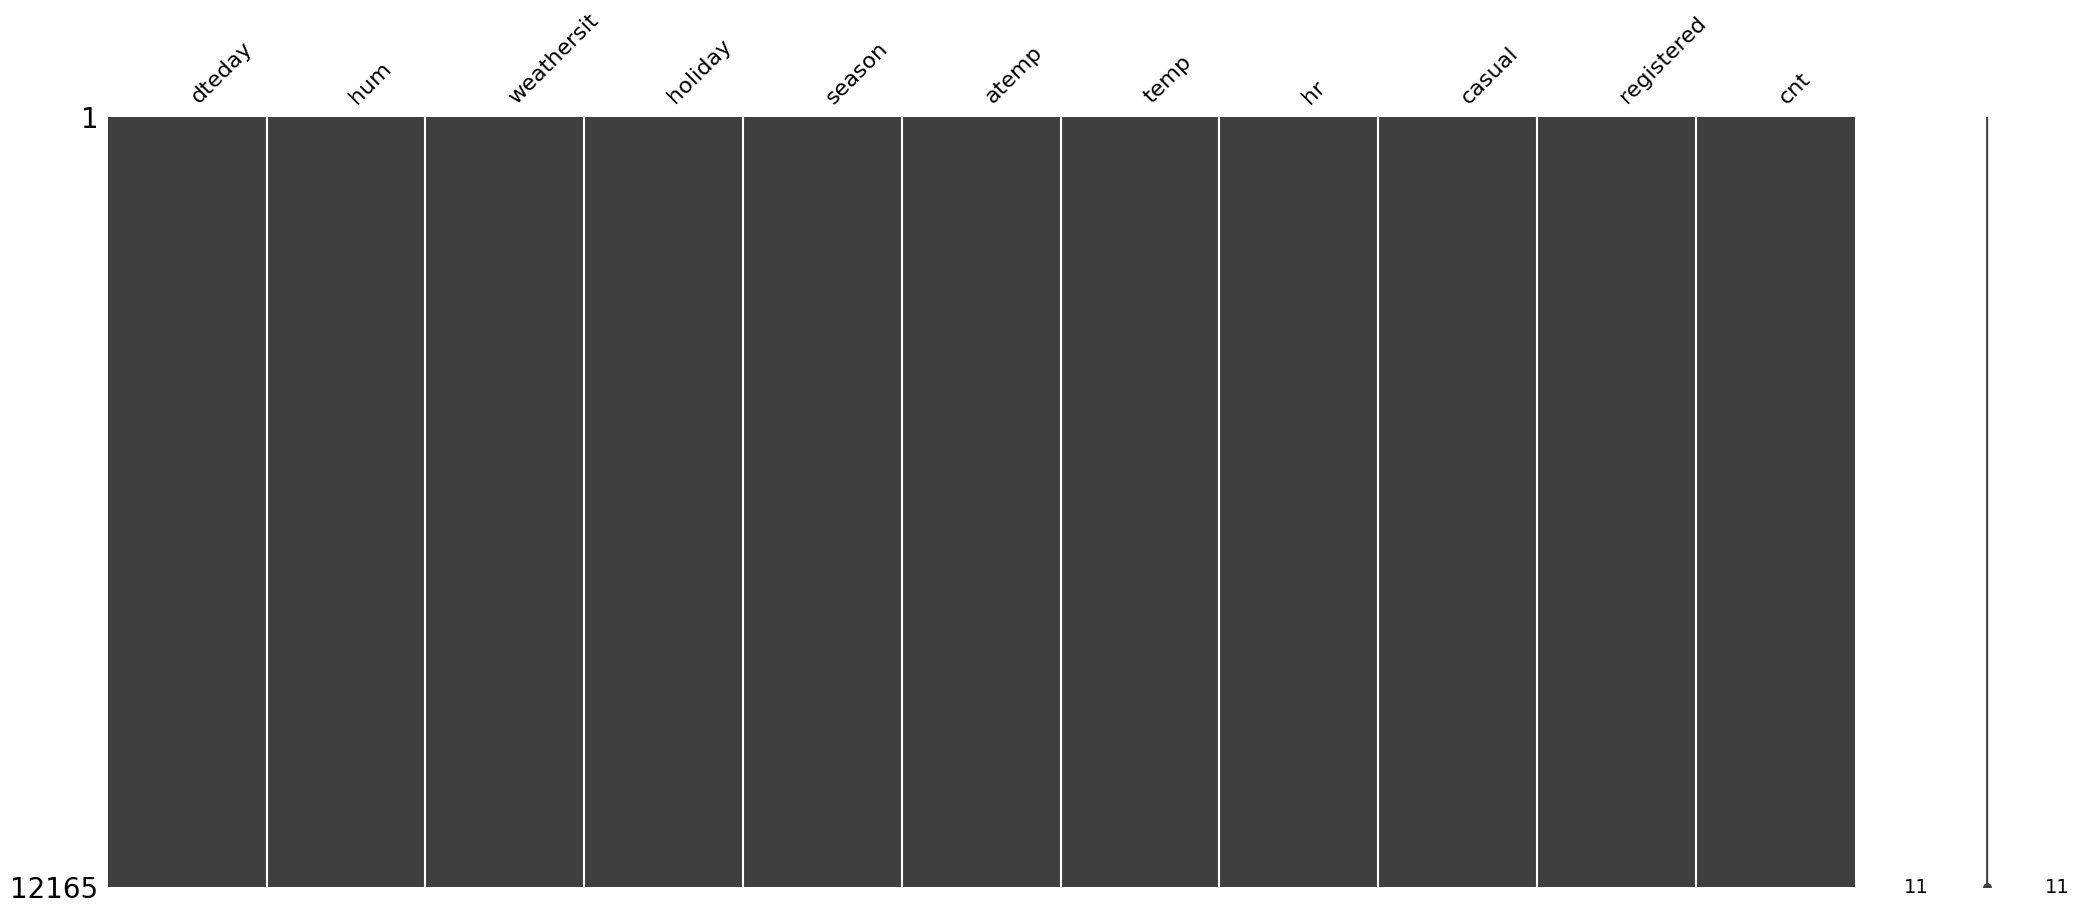

In [6]:
missingno.matrix(df)


`Tidak ada data kosong` pada dataset

## Data Duplikat

cek data duplikat atas semua kolom

In [7]:
# jumlah yang duplikat
df.duplicated().sum()


0

Pengecekan semua kolom `tidak menampilkan adanya data duplikat`

cek data duplikat kecuali fitur `dteday`

In [8]:
# Mendapatkan daftar semua kolom
all_columns = df.columns.tolist()

# Hapus kolom dteday dari daftar kolom
subset_columns = all_columns.copy()
subset_columns.remove('dteday')

# Temukan baris yang duplikat berdasarkan kolom yang tersisa (tanpa kolom dteday)
duplicate_rows = df[df.duplicated(subset=subset_columns, keep=False)]
display(duplicate_rows.sort_values(by='hum'))
display(f'Total duplicate: {duplicate_rows.shape[0]} baris')


,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
5050,2012-02-29,0.56,1,0,1,0.2879,0.30,2,0,4,4
3564,2012-03-07,0.56,1,0,1,0.2879,0.30,2,0,4,4
6350,2012-02-07,0.61,1,0,1,0.3333,0.30,2,0,4,4
5433,2012-02-15,0.61,1,0,1,0.3333,0.30,2,0,4,4
1924,2011-03-08,0.64,1,0,1,0.2727,0.22,4,0,2,2
3082,2012-02-21,0.64,1,0,1,0.2727,0.22,4,0,2,2
7731,2011-12-10,0.65,1,0,4,0.2576,0.24,6,1,10,11
1776,2011-12-03,0.65,1,0,4,0.2576,0.24,6,1,10,11
5401,2011-07-11,0.74,1,0,3,0.6212,0.66,4,0,4,4
971,2012-07-26,0.74,1,0,3,0.6212,0.66,4,0,4,4


'Total duplicate: 22 baris'

Terdapat `22 baris data duplikat` tanpa kolom dteday, sehingga salah satunya harus didrop

## Variable Numerik

### Statistika Deskriptif

In [9]:
df.describe()


,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
count,12165,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,2012-01-01 02:04:45.869297408,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,35.834443,153.436580,189.271023
min,2011-01-01 00:00:00,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 00:00:00,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,17.000000,115.000000,142.000000
75%,2012-07-03 00:00:00,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,49.000000,220.000000,282.000000
max,2012-12-31 00:00:00,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,23.000000,362.000000,876.000000,970.000000
std,NaN,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,49.489286,151.046123,181.223903


**Pengamatan**

>- Dari hasil statistik data bike-sharing, rata-rata kelembaban udara (hum) tercatat sebesar 0.62. Mayoritas kondisi cuaca berada dalam kategori cerah atau berawan (kategori 1 dan 2). Hari libur tercatat hanya sekitar 3%. Suhu rata-rata (temp) mencapai 0.49, sementara suhu terasa (atemp) sekitar 0.47. Pengguna kasual rata-rata sekitar 35 orang per hari, dan pengguna terdaftar sebanyak 153 orang per hari. Menunjukkan kecenderungan masyarakat memilih untuk mendaftar. Rata-rata total penyewaan sepeda per hari mencapai 189 unit, dengan maksimum 970 unit penyewaan.

Terdapat `nilai minimum 0` pada:
>- Fitur `hum`, menandakan kelembapan sangat rendah atau 0 persen kelembapan
>- Fitur `holiday`, menandakan kondisi tidak libur (pengkategorian)
>- Fitur `atemp`, menandakan kondisi suhu yang sangat dingin -16 degC
>- Fitur `hr`, menandakan aktifitas penggunaan pada jam 0 (tengah malam)
>- Fitur `casual`, menandakan tidak ada pengguna tanpa keanggotaan
>- Fitur `registered`, tidak ada pengguna terdaftar

Nilai 0 pada fitur holiday, hr, casual, registered menunjukkan kondisi wajar, sehingga akan dilakukan `pengecekan pada fitur ham dan atemp`

In [10]:
display('nilai minimum 0 pada hum')
display(df[df['hum']==0])
print()
display('nilai minimum 0 pada atemp')
display(df[df['atemp']==0])


'nilai minimum 0 pada hum'

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
345,2011-03-10,0.0,3,0,1,0.3939,0.38,7,1,36,37
871,2011-03-10,0.0,3,0,1,0.4394,0.44,15,3,11,14
1645,2011-03-10,0.0,3,0,1,0.3182,0.34,0,3,0,3
3239,2011-03-10,0.0,2,0,1,0.4394,0.44,17,2,109,111
3717,2011-03-10,0.0,2,0,1,0.3333,0.34,22,4,30,34
4924,2011-03-10,0.0,3,0,1,0.3333,0.36,6,0,12,12
7285,2011-03-10,0.0,3,0,1,0.3182,0.34,1,0,2,2
7760,2011-03-10,0.0,3,0,1,0.4242,0.42,12,4,30,34
8412,2011-03-10,0.0,3,0,1,0.3939,0.38,8,1,43,44
8960,2011-03-10,0.0,3,0,1,0.3485,0.34,23,1,26,27


'nilai minimum 0 pada atemp'

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
6624,2011-01-22,0.41,2,0,1,0.0,0.04,1,3,9,12


**Pengamatan**

>- Nilai hum 0 memiliki weathersit 2-3 (kabut - salju) yang cenderung memiliki kelembapan udara yang tinggi sehingga data ini tidak wajar dan sebaiknya di drop saja 
>- Nilai atemp 0 menunjukkan suhu rasa berada pada -16°C, suhu yang tercatat (temp) adalah 0.04 atau -6°C. Melihat selisih suhu yang cukup signifikan, data ini tidak wajar sebaiknya di drop
[referensi](https://www.chicagotribune.com/2011/12/16/ask-tom-why-has-the-relative-humidity-ever-dropped-to-zero-percent/)

### Distribusi Data

In [11]:
len(df.select_dtypes(include = 'number').columns)


10

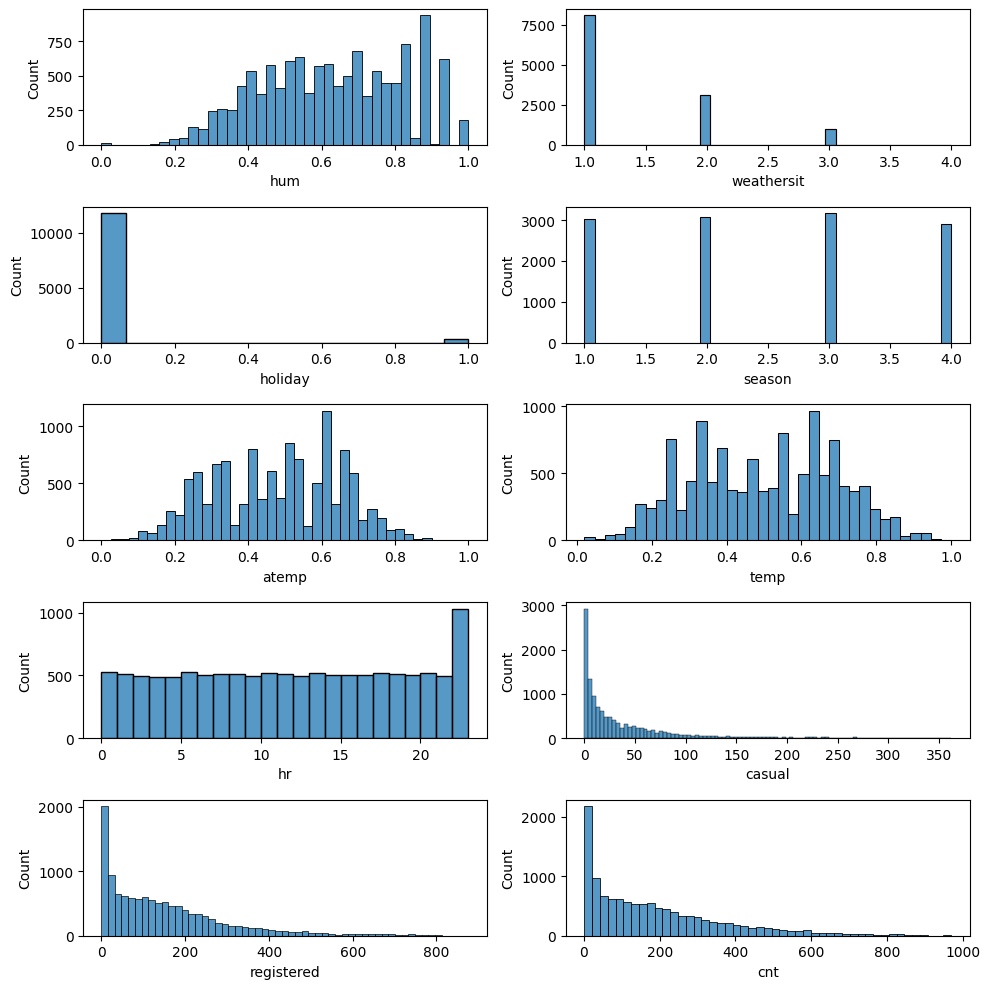

In [12]:
numerik = df.select_dtypes(include = 'number')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))

posisi = 1 # menginisiasi posisi mulai dari 1
for setiap_kolom in numerik.columns: # numerik.columns = nama-nama kolom dalam list
    plt.subplot(5,2,posisi)
    sns.histplot(df[setiap_kolom])
    posisi = posisi + 1
    # # agar tidak bertumpuk
    plt.tight_layout()


**Pengamatan**
>- hum (Kelembaban): Distribusi kelembaban cukup merata, dengan puncak pada nilai 1.0 (lembab)
>- weathersit (Kondisi Cuaca): Sebagian besar data menunjukkan cuaca kategori 1 (cerah atau berawan ringan).
>- holiday (Hari Libur): Mayoritas data menunjukkan bahwa hari-hari bukan hari libur.
>- season (Musim): Musim tampak terdistribusi merata di seluruh kategori.
>- atemp (Suhu Terasa) dan temp (Suhu): Kedua fitur ini cenderung memiliki pola yang sama, berbentuk seperti lonceng.
>- hr (Jam): Distribusi penyewaan sepeda tampak merata sepanjang hari, dengan peningkatan signifikan pada pukul 21:00.
>- casual (Pengguna Kasual): Mayoritas pengguna kasual melakukan penyewaan kurang dari 50 kali, dengan jumlah yang menurun pada frekuensi lebih tinggi.
registered (Pengguna Terdaftar): Sebagian besar pengguna terdaftar menyewa sepeda dengan frekuensi rendah, dengan distribusi yang menurun untuk pengguna yang lebih sering.
>- cnt (Total Penyewaan): Total penyewaan memiliki distribusi yang serupa dengan pengguna terdaftar, dengan sebagian besar penyewaan di bawah 200 unit per hari.


#### Uji statistika

akan dilakukan uji statistika untuk mengecek normalisasi data dengan menggunakan D’Agostino-Pearson karena dataset memiliki 12ribu baris

In [13]:
from scipy.stats import normaltest

data = df.select_dtypes(include = 'number')
print ("Uji D'Agustino Pearson")
for tiap_kolom in data.columns:
    stat, pval = normaltest(data[tiap_kolom])
    if pval > 0.05:
        print(f'Kolom {tiap_kolom} memiliki distribusi normal')
    else:
        print(f'Kolom {tiap_kolom} tidak memiliki distribusi normal')


Uji D'Agustino Pearson
Kolom hum tidak memiliki distribusi normal
Kolom weathersit tidak memiliki distribusi normal
Kolom holiday tidak memiliki distribusi normal
Kolom season tidak memiliki distribusi normal
Kolom atemp tidak memiliki distribusi normal
Kolom temp tidak memiliki distribusi normal
Kolom hr tidak memiliki distribusi normal
Kolom casual tidak memiliki distribusi normal
Kolom registered tidak memiliki distribusi normal
Kolom cnt tidak memiliki distribusi normal


Semua data numerik `tidak memiliki distribusi normal`

### Outliers

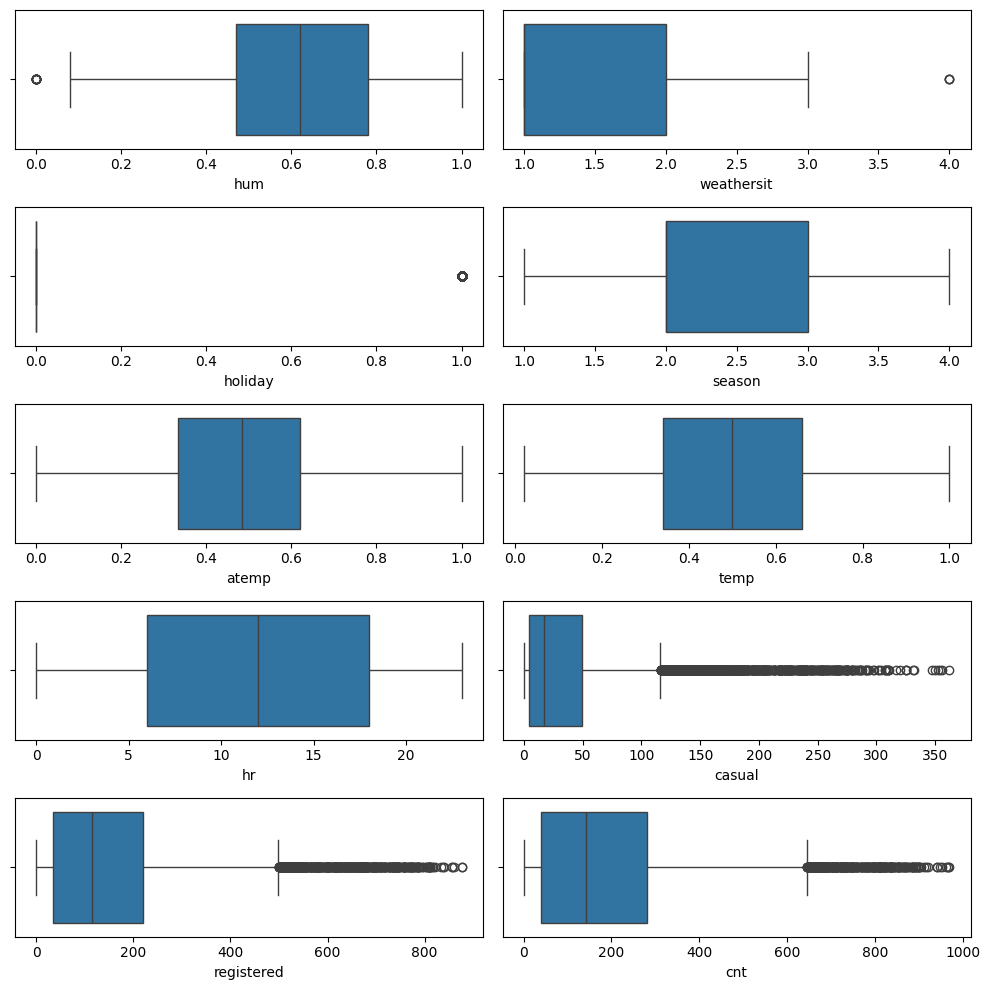

In [14]:
numerik = df.select_dtypes(include = 'number')

plt.figure(figsize = (10,10))

posisi = 1
for setiap_kolom in numerik.columns:
    plt.subplot(5,2,posisi)
    sns.boxplot(x = df[setiap_kolom])
    posisi = posisi + 1

    plt.tight_layout()


**Pengamatan**

>- Kelembaban dan suhu: Sebagian besar data berada pada rentang yang normal tanpa banyak outlier.
>- Pengguna kasual dan terdaftar: Terdapat sejumlah outlier dengan jumlah penyewaan yang sangat tinggi, terutama di atas 50 untuk pengguna kasual dan 600 untuk pengguna terdaftar.
>- Total penyewaan: Distribusi total penyewaan sepeda menunjukkan mayoritas berada di bawah 400, dengan beberapa outlier di atas 600.


### Korelasi

<Axes: >

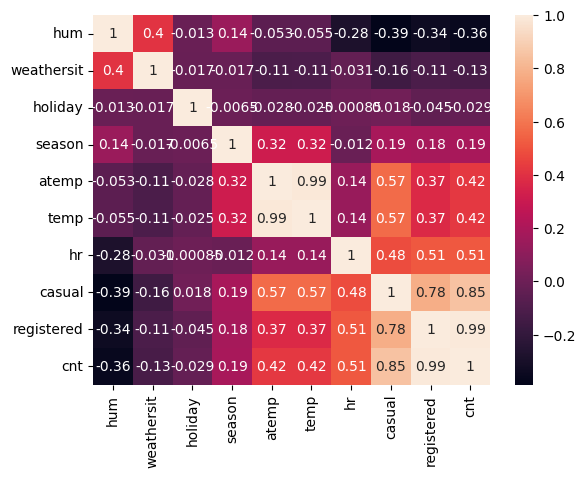

In [15]:
sns.heatmap(numerik.corr(method = 'spearman'), annot = True)


**Pengamatan**
>- Cnt (Total Penyewaan) sangat berkorelasi positif dengan registered (pengguna terdaftar) (0.99) dan casual (pengguna kasual) (0.85). Ini menunjukkan bahwa kedua jenis pengguna secara langsung memengaruhi total penyewaan. Hal itu disebabkan karena cnt merupakan penjumlahan dari data casual dan registered
>- Temp dan atemp juga memiliki korelasi yang kuat dengan cnt (0.42) dan (0.42), menunjukkan bahwa suhu memengaruhi jumlah penyewaan. Terdapat juga korelasi yang positif antara kedua fitur tersebut
>- Hum (Kelembaban) dan weathersit (kondisi cuaca) menunjukkan korelasi negatif dengan cnt, masing-masing sebesar -0.36 dan -0.13, artinya cuaca buruk dan kelembaban tinggi menurunkan jumlah penyewaan. Terlihat juga korelasi yang positif antara hum dan weathershit

### Multikolineartias dengan VIF

Kita akan mengukur multikolinearitas atau korelasi antar fitur yang tinggi dengan menggunakan variance inflation factor (VIF)

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    # menghitung vif untuk setiap kolom nya
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

calc_vif(numerik.drop(columns = 'cnt')).sort_values(by = 'VIF', ascending = False)


,variables,VIF
4,atemp,341.087977
5,temp,306.849662
0,hum,12.920644
1,weathersit,7.151265
3,season,6.963636
6,hr,4.039528
8,registered,3.093553
7,casual,2.584010
2,holiday,1.036865


**Pengamatan**

>- atemp (341.08) dan temp (306.85) memiliki nilai VIF yang sangat tinggi, menunjukkan multikolinearitas yang sangat kuat di antara keduanya. Ini berarti kedua variabel ini sangat berkorelasi satu sama lain dan bisa saling menggantikan.
>- hum (12.92), weathersit (7.15), dan season (6.96) juga memiliki VIF tinggi, menunjukkan korelasi yang signifikan dengan variabel lain.
>- registered (3.09) dan casual (2.58) memiliki VIF yang lebih rendah, menunjukkan mereka memiliki korelasi yang lebih sedikit dengan variabel lain.

Variabel dengan VIF tinggi (terutama di atas 10) perlu dievaluasi, dan mungkin ada baiknya mempertimbangkan untuk menghapus salah satunya untuk mengurangi multikolinearitas. Sehingga `atemp` dan `hum` akan di drop.

Variabel`casual`dan `registered` memiliki nilai VIF yang rendah, namun ternyata merupakan informasi yang sama. Sebaiknya di drop karena merupakan overlapping information (redundant) terhadap `cnt`

Berikut proporsi casual dan registered

In [17]:
casual = df['casual'].sum()
registered = df['registered'].sum()
total_user =  df['cnt'].sum()

print(f'Pengguna casual: {(casual/total_user*100):.2f} % user')
print(f'Pengguna registered: {(registered/total_user*100):.2f} % user')


Pengguna casual: 18.93 % user
Pengguna registered: 81.07 % user


secara umum, pengguna register memiliki proporsi yang lebih banyak

# Data Cleaning

Untuk memperoleh data bersih, kita akan mengcopy data asli

In [18]:
df_clean = df.copy()
display(df_clean.shape)
df_clean.head(2)


(12165, 11)

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18


## Drop data duplicate

Kita akan drop 11 data yang sama

In [19]:
df_clean.drop_duplicates(subset=subset_columns,keep='first',inplace=True)
display(df_clean.shape)
df_clean.head(2)


(12154, 11)

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18


## Drop fitur `hum`, `atemp`, `weathersit`, `casual`, dan `registered`

>- Kita akan drop fitur yang `berkorelasi negatif dengan cnt dan memiliki keterangan yang sama denga fitur yang lain` yaitu `hum dan weathersit`,
>- Fitur `atemp, registered dan casual` di drop karena fitur `temp dan cnt` memiliki informasi yang sama

In [20]:
df_clean = df_clean.drop(['hum','atemp','weathersit','casual','registered'],axis=1)
df_clean.head()


,dteday,holiday,season,temp,hr,cnt
0,2011-12-09,0,4,0.36,16,250
1,2012-06-17,0,2,0.54,4,18
2,2011-06-15,0,2,0.62,23,107
3,2012-03-31,0,2,0.36,8,145
4,2012-07-31,0,3,0.76,18,857


## Split fitur `dteday`


In [21]:
# Split kolom `dteday`
df_clean['year'] = df_clean['dteday'].dt.year
df_clean ['month'] = df_clean['dteday'].dt.month
df_clean ['day'] = df_clean['dteday'].dt.day_name()
df_clean['day1'] = df_clean['dteday'].dt.weekday + 1

df_clean['holiday'] = df_clean['holiday'].astype('category')
df_clean['year'] = df_clean['year'].astype('category')
df_clean['month'] = df_clean['month'].astype('category')


## Drop fitur `dteday`

>- `dteday` di drop karena sudah dilakukan split kolom keterangan waktu  

In [22]:
df_clean = df_clean.drop(['dteday'],axis=1)
df_clean.head()


,holiday,season,temp,hr,cnt,year,month,day,day1
0,0,4,0.36,16,250,2011,12,Friday,5
1,0,2,0.54,4,18,2012,6,Sunday,7
2,0,2,0.62,23,107,2011,6,Wednesday,3
3,0,2,0.36,8,145,2012,3,Saturday,6
4,0,3,0.76,18,857,2012,7,Tuesday,2


## Update ketarangan fitur `weathersit`, `holiday`, `season`

Kita akan melakukan penyesuaian keterangan `value fitur kategori` agar identitas dari tiap fitur dapat diterjemahkan dengan baik oleh mesin melalui proses scaling dan juga sehingga dapat lebih memahami keterangan tiap data 

In [23]:
df_clean['holiday'] = df_clean['holiday'].replace({0:'bukan libur',1:'libur'})
df_clean['season'] = df_clean['season'].replace({1:'dingin',2:'semi',3:'panas',4:'gugur'})
df_clean


C:\Users\irma.manik\AppData\Local\Temp\ipykernel_5564\2372130067.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_clean['holiday'] = df_clean['holiday'].replace({0:'bukan libur',1:'libur'})


,holiday,season,temp,hr,cnt,year,month,day,day1
0,bukan libur,gugur,0.36,16,250,2011,12,Friday,5
1,bukan libur,semi,0.54,4,18,2012,6,Sunday,7
2,bukan libur,semi,0.62,23,107,2011,6,Wednesday,3
3,bukan libur,semi,0.36,8,145,2012,3,Saturday,6
4,bukan libur,panas,0.76,18,857,2012,7,Tuesday,2
...,...,...,...,...,...,...,...,...,...
12160,bukan libur,dingin,0.24,7,257,2012,1,Wednesday,3
12161,bukan libur,panas,0.78,0,102,2012,7,Friday,5
12162,libur,dingin,0.24,5,6,2012,2,Monday,1
12163,bukan libur,semi,0.42,2,69,2012,3,Saturday,6


## Perbaiki nama fitur

<Axes: >

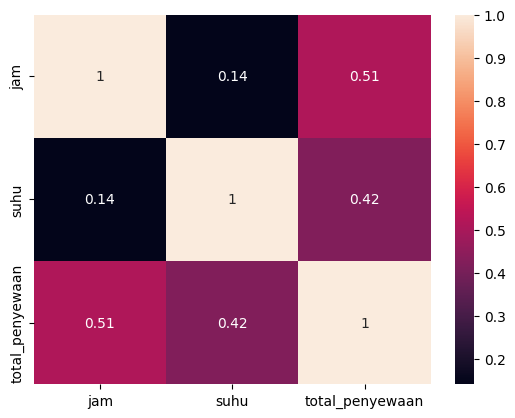

In [24]:
df_clean = df_clean.rename(columns={
    'holiday': 'ket_libur',
    'season': 'musim',
    'temp': 'suhu',
    'cnt': 'total_penyewaan',
    'hr': 'jam'
})
# Mengurutkan kolom
heat= df_clean[['day', 'month', 'year','jam','ket_libur', 'musim', 'suhu','total_penyewaan']]

numerik = heat.select_dtypes(include = 'number')
sns.heatmap(numerik.corr(method='spearman'),annot=True)


In [25]:
print(f'Total baris data yang dicleaning: {df.shape[0] - df_clean.shape[0]}')


Total baris data yang dicleaning: 11


# Explanatory data analysis (EDA)

## Data unik

In [26]:
df_eda =df_clean
def data_unik(df_clean):
    data_unik = pd.DataFrame()
    data_unik ['Kolom'] = df_clean.columns
    data_unik ['Jumlah data unik'] = [df_clean[kolom].nunique() for kolom in df_clean.columns]
    data_unik ['Data unik'] = [df_clean[kolom].unique() for kolom in df_clean.columns]
    
    data_unik.index +=1
    
    return data_unik

data_unik(df_clean)


,Kolom,Jumlah data unik,Data unik
1,ket_libur,2,"['bukan libur', 'libur'] Categories (2, object..."
2,musim,4,"[gugur, semi, panas, dingin]"
3,suhu,50,"[0.36, 0.54, 0.62, 0.76, 0.46, 0.7, 0.26, 0.82..."
4,jam,24,"[16, 4, 23, 8, 18, 0, 22, 9, 5, 7, 14, 15, 21,..."
5,total_penyewaan,830,"[250, 18, 107, 145, 857, 45, 216, 40, 7, 534, ..."
6,year,2,"[2011, 2012] Categories (2, int32): [2011, 2012]"
7,month,12,"[12, 6, 3, 7, 10, ..., 2, 5, 9, 4, 11] Length:..."
8,day,7,"[Friday, Sunday, Wednesday, Saturday, Tuesday,..."
9,day1,7,"[5, 7, 3, 6, 2, 1, 4]"


In [27]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 12154 entries, 0 to 12164
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ket_libur        12154 non-null  category
 1   musim            12154 non-null  object  
 2   suhu             12154 non-null  float64 
 3   jam              12154 non-null  int64   
 4   total_penyewaan  12154 non-null  int64   
 5   year             12154 non-null  category
 6   month            12154 non-null  category
 7   day              12154 non-null  object  
 8   day1             12154 non-null  int32   
dtypes: category(3), float64(1), int32(1), int64(2), object(2)
memory usage: 653.3+ KB


## Jumlah penyewa berdasarkan  musim

C:\Users\irma.manik\AppData\Local\Temp\ipykernel_5564\3055913575.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=jumlah_penyewa_per_musim.index, y=jumlah_penyewa_per_musim.values, palette='viridis')


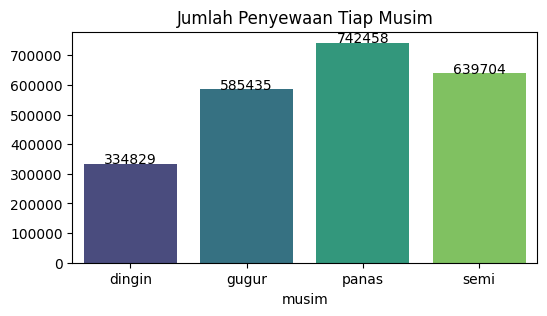

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung jumlah penyewaan per musim
jumlah_penyewa_per_musim = df_eda.groupby('musim')['total_penyewaan'].sum()

# Membuat plot
plt.figure(figsize=(6, 3))
barplot = sns.barplot(x=jumlah_penyewa_per_musim.index, y=jumlah_penyewa_per_musim.values, palette='viridis')
plt.title('Jumlah Penyewaan Tiap Musim')

# Menambahkan keterangan nama musim di setiap bar
for index, value in enumerate(jumlah_penyewa_per_musim.values):
    plt.text(index , value, f'{value:.0f}', ha='center')

# Menampilkan plot
plt.show()


Jumlah penyewa paling banyak adalah pada saat musim panas

## Proporsi penyewa (Libur vs Bukan Libur)

C:\Users\irma.manik\AppData\Local\Temp\ipykernel_5564\1189530111.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  jumlah_penyewa_per_musim = df_eda.groupby('ket_libur')['total_penyewaan'].sum()


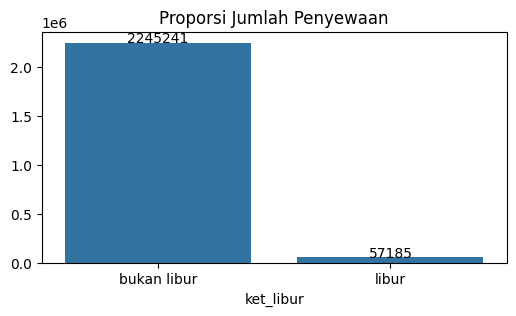

In [29]:
# Menghitung jumlah penyewaan per musim
jumlah_penyewa_per_musim = df_eda.groupby('ket_libur')['total_penyewaan'].sum()

# Membuat plot
plt.figure(figsize=(6, 3))
barplot = sns.barplot(x=jumlah_penyewa_per_musim.index, y=jumlah_penyewa_per_musim.values)
plt.title('Proporsi Jumlah Penyewaan')

# Menambahkan keterangan nama musim di setiap bar
for index, value in enumerate(jumlah_penyewa_per_musim):
    plt.text(index, value , value, ha='center')

# Menampilkan plot
plt.show()


Jumlah penyewa mendominasi pada hari bukan libur dan selisih penyewa sangat signifikan dibanding dengan hari libur 

## Jumlah penyewa terhadap fitur lain

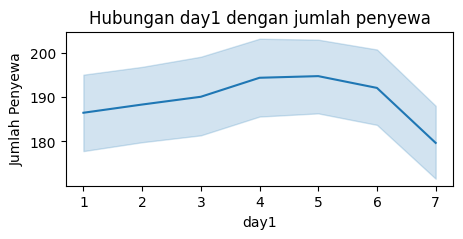

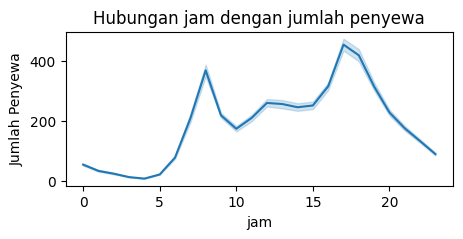

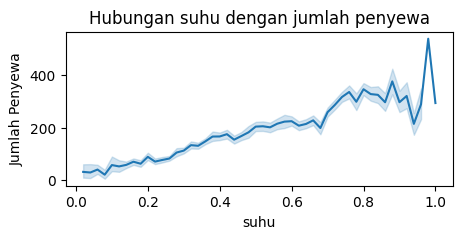

In [30]:
data = ['day1','jam','suhu']

posisi = 1
for i in data:
    plt.figure(figsize=(5,2))
    sns.lineplot(x=i,y = 'total_penyewaan',data=df_eda)

    plt.title(f'Hubungan {i} dengan jumlah penyewa')
    plt.xlabel(i)
    plt.ylabel('Jumlah Penyewa')
    posisi +=1
    plt.show()


Jika kita melakukan  perbandingan antara fitur hari, jam, dan suhu terhadap jumlah penyewa, diperoleh hasil sbagai berikut:
>- Jumlah penyewa secara perlahan meningkat dari hari-1 (senin) dan mulai berkurang setelah weekend di hari 6 (Sabtu) dan sangat rendah di hari minggu
>- Jumlah penyewa fulktuatif pada pagi hari (6-12) cenderung lebih tinggi pada jam 7-8, meningkat di siang hari (12-18),  dan berkurang di malam hari (18-6)
>- Jumlah penyewa cenderung meningkat seiring dengan penambahan suhu

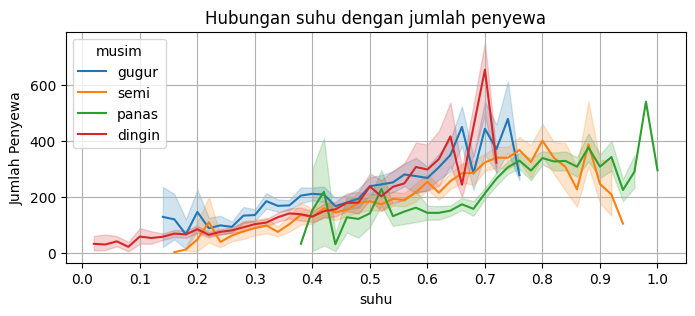

In [31]:
plt.figure(figsize=(8,3))
sns.lineplot(x='suhu',y = 'total_penyewaan',hue='musim',data=df_eda)

plt.title('Hubungan suhu dengan jumlah penyewa')
plt.xlabel('suhu')
plt.ylabel('Jumlah Penyewa')

plt.xticks(np.arange(0,1.1,0.1))
plt.grid()
plt.show()


>- Jika dilihat berdasarkan jenis musimnya, pada tiap musim cenderung meningkat seiring kenaikan suhu namun kembali turun secara signifikan setelah mencapai suhu tertinggi di tiap musim. 
>- Secara umum, terlihat bahwa penyewa `mendominasi pada suhu tinggi`
>- Musim panas mengalami peningkatan cukup signifikan seiring dengan kenaikan suhu, sementara musim dingin memiliki sedikit variasi/jumlah penyewa yang relatif tetap seiring perubahan suhu.

## Penyewa per Jam (Libur vs Bukan Libur)

In [32]:
by_jam = df_eda.copy() [['jam','ket_libur','total_penyewaan']]
by_jam = pd.pivot_table(by_jam, index='jam', values=['total_penyewaan'],columns='ket_libur', aggfunc='sum')
# by_jam.head()


C:\Users\irma.manik\AppData\Local\Temp\ipykernel_5564\3729165216.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  by_jam = pd.pivot_table(by_jam, index='jam', values=['total_penyewaan'],columns='ket_libur', aggfunc='sum')


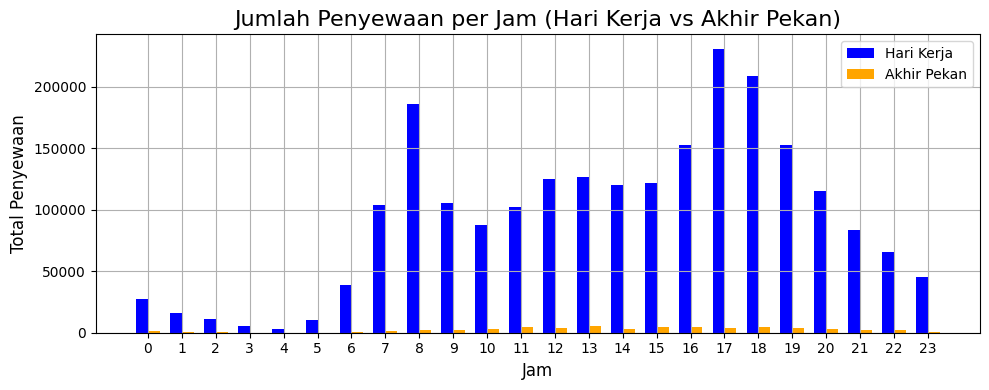

In [33]:
# Data preparation
jam = by_jam.index
hari_kerja = by_jam.values[:,0]  # First column
akhir_pekan = by_jam.values[:,1]  # Second column

plt.figure(figsize=(10,4))

bar_width = 0.35
index = np.arange(len(jam))

# Plot bars for 'bukan libur' and 'libur'
plt.bar(index, hari_kerja, bar_width, label='Hari Kerja', color='blue')
plt.bar(index + bar_width, akhir_pekan, bar_width, label='Akhir Pekan', color='orange')

# Add labels and title
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Total Penyewaan', fontsize=12)
plt.title('Jumlah Penyewaan per Jam (Hari Kerja vs Akhir Pekan)', fontsize=16)

# Add tick marks for hours and position them at the center of the bars
plt.xticks(index + bar_width / 2, jam)

# Add legend and grid
plt.legend()
plt.grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()


**Pengamatan**

Melalui tiap kesimpulan Explanatory Data Analysis tersebut, kita akan mengasumsikan sebagai berikut:
- Hari bukan libur sebagai hari kerja yang jumlah penyewanya lebih banyak
    - Senin - Jumat : Hari kerja (cenderung meningkat)
    - Sabtu - Minggu : Akhir Pekan (cenderung berkurang)
- Pengkategorian waktu dibagi menjadi 3, yaitu:
    - Pagi : 06.00 - 12.00 (banyak penyewa)
    - Siang : >12.00 - 18.00 (lebih banyak penyewa)
    - Malam : >18.00 dan <06.00 (sedikit penyewa)
- Suhu semakin tinggi (banyak penyewa)

## Saved in variable

In [34]:
df_clean =df_clean.drop(columns='day')


# Data Preprocessing

## Feature Engineering

Kita akan menambahkan beberapa fitur agar model lebih baik dalam membaca pola data.

In [35]:
#jam sibuk
def jam_sibuk (jam):
    if (6 <= jam <= 12) or (12 < jam <= 18):
        return 1
    else:
        return 0
df_clean ['jam_sibuk'] = df_clean ['jam'].apply(jam_sibuk)
df_clean['akhir pekan']=np.where(df_clean['day1']>5,0,1)
df_clean.rename(columns = {'day1':'day'},inplace=True)
df_clean.head(2)


,ket_libur,musim,suhu,jam,total_penyewaan,year,month,day,jam_sibuk,akhir pekan
0,bukan libur,gugur,0.36,16,250,2011,12,5,1,1
1,bukan libur,semi,0.54,4,18,2012,6,7,0,0


In [36]:
df_clean['day'] =df_clean['day'].astype('category')
df_clean['akhir pekan'] =df_clean['akhir pekan'].astype('category')


In [37]:
# Memisahkan data independen variabel dengan target
x = df_clean.drop(columns = ['total_penyewaan'])
y = df_clean['total_penyewaan']


## Train dan Test Splitting

In [38]:
# data prep
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, RobustScaler, OneHotEncoder, StandardScaler
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, MinMaxScaler, OrdinalEncoder


In [39]:
x_train,x_test,y_train,y_test = train_test_split(
    x,
    y,
    test_size = 0.2,
    random_state = 2024)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((9723, 9), (2431, 9), (9723,), (2431,))

## Data Preparation

Kita akan melakukan penyesuaian terhadap data pada fitur kategorikal dengan terlebih dahulu melakukan identifikasi data kategori unik sebagai berikut:

In [40]:
data_prep = pd.DataFrame({"Tipe data": x.dtypes,
              "jumlah data unik" : x.nunique()})
data_prep.sort_values(by = 'jumlah data unik',ascending=False)


,Tipe data,jumlah data unik
suhu,float64,50
jam,int64,24
month,category,12
day,category,7
musim,object,4
ket_libur,category,2
year,category,2
jam_sibuk,int64,2
akhir pekan,category,2


Berdasarkan pertimbangan jumlah data unik diatas, hasil analisa outlier, dan analisa jenis distribusi data (tidak normal), maka:
>- Fitur numerik menggunakan `minmax`
>- Fitur kategorik `day, month, year` encoding dengan `ordinal` untuk efisiensi encoding. Karena ketika menggunakan `binary` proses pengolahan data sangat lama, saya memutuskan untuk menggunakan encoder ini. _Menurut Max Kuhn dan Kjell Johnson  "Feature Engineering and Selection: A Practical Approach for Predictive Models", dijelaskan fitur kategori terbatas 'month, day, dan year' masuk akal secara semantik diencode dalam konteks data._
>- `musim dan ket_libur` menggunakan `onehot` karena fitur tidak memiliki urutan dan unique value <5  

[Serokell Software Development Company](https://serokell.io/blog/feature-engineering-for-machine-learning)

In [41]:
df_clean.head(2)


,ket_libur,musim,suhu,jam,total_penyewaan,year,month,day,jam_sibuk,akhir pekan
0,bukan libur,gugur,0.36,16,250,2011,12,5,1,1
1,bukan libur,semi,0.54,4,18,2012,6,7,0,0


In [42]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 12154 entries, 0 to 12164
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ket_libur        12154 non-null  category
 1   musim            12154 non-null  object  
 2   suhu             12154 non-null  float64 
 3   jam              12154 non-null  int64   
 4   total_penyewaan  12154 non-null  int64   
 5   year             12154 non-null  category
 6   month            12154 non-null  category
 7   day              12154 non-null  category
 8   jam_sibuk        12154 non-null  int64   
 9   akhir pekan      12154 non-null  category
dtypes: category(5), float64(1), int64(3), object(1)
memory usage: 629.9+ KB


In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, MinMaxScaler, OrdinalEncoder

transformer = ColumnTransformer([
    ('onehot',OneHotEncoder(drop = 'first'),['ket_libur', 'musim']),
    ('ordinal',OrdinalEncoder(),['day','month','year']),
    ('minmax',MinMaxScaler(),['suhu', 'jam','jam_sibuk','akhir pekan'])
],remainder = 'passthrough')
transformer


ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['ket_libur', 'musim']),
                                ('ordinal', OrdinalEncoder(),
                                 ['day', 'month', 'year']),
                                ('minmax', MinMaxScaler(),
                                 ['suhu', 'jam', 'jam_sibuk', 'akhir pekan'])])

# Modeling

In [44]:
# model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_validate, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.compose import TransformedTargetRegressor

# evaluation
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor



## Rule Based Model (Non ML)

Kita akan membuat rule based/aturan dasar berdasarkan ambang batas tertentu pada kategori `hari & jam`, `bulan, musim & suhu`, keterangan `libur` atas jumlah penyewa:

- Hari & jam:
    - Pada hari kerja jumlah penyewa cenderung meningkat dan cenderung berkurang pada akhir pekan (sabtu & minggu)
    - Jam pagi (06.00 - 12.00) banyak penyewa, siang(>12.00 - 18.00) lebih banyak penyewa, dan malam ( >18.00 dan <06.00) sedikit penyewa
-  Bulan, musim, dan suhu:
    - Musim panas (Juni - Agustus) suhu >30°C, penyewa paling tinggi karena turis menggunakan untuk rekreasi dan harian
    - Musim dingin (Desember - Februari) suhu 0°C - 10°C, penyewa rendah
    - Musim semi (Maret - Mei) dan musim gugur (Sebtember - November) suhu 10°C - 25°C penyewa cenderung tinggi
- Hari kerja pengguna sangat tinggi

note:
- inisiasi_bobot : 1
- highest bobot : 1.5
- lowest bobot : 0.5


In [45]:
df_clean.describe()


,suhu,jam,total_penyewaan,jam_sibuk
count,12154.00000,12154.000000,12154.000000,12154.000000
mean,0.49819,11.526987,189.437716,0.542784
std,0.19250,6.930778,181.221116,0.498187
min,0.02000,0.000000,1.000000,0.000000
25%,0.34000,6.000000,40.000000,0.000000
50%,0.50000,12.000000,142.000000,1.000000
75%,0.66000,18.000000,282.000000,1.000000
max,1.00000,23.000000,970.000000,1.000000


In [46]:
def rule_based(row):
    # Inisialisasi sharing_projection
    sharing_projection = 1.0
    
    # Aturan berdasarkan hari dan jam
    if row['day'] in ['Sunday', 'Saturday']:  # Akhir pekan
        sharing_projection *= 0.7
        if 6 <= row['jam'] <= 12:
            sharing_projection *= 1.2
        elif 13 <= row['jam'] <= 18:
            sharing_projection *= 1.5
        else:
            sharing_projection *= 0.5
    else:  # Hari kerja'
        sharing_projection *= 1.5
        if 6 <= row['jam'] <= 12:
            sharing_projection *= 1.2
        elif 13 <= row['jam'] <= 18:
            sharing_projection *= 1.5
        else:
            sharing_projection *= 0.5

    # Aturan berdasarkan bulan, musim
    if row['month'] in [6, 7, 8]:  # Musim panas
        sharing_projection *= 1.5
    elif row['month'] in [3, 4, 5, 9, 10, 11]:  # Musim semi/gugur
        sharing_projection *= 1.2
    elif row['month'] in [12, 1, 2]:  # Musim dingin
        sharing_projection *= 0.7
    

    # Aturan berdasarkan hari libur 
    if row['ket_libur'] == 'libur':
        sharing_projection *= 1.5
    else:
        sharing_projection *= 0.5

    return sharing_projection

# Terapkan fungsi ke dataframe
df_clean['sharing_projection'] = df_clean.apply(rule_based, axis=1)
df_clean.sort_values(by='sharing_projection', ascending=False)


,ket_libur,musim,suhu,jam,total_penyewaan,year,month,day,jam_sibuk,akhir pekan,sharing_projection
6928,libur,panas,0.82,16,452,2011,7,1,1,1,5.0625
2472,libur,panas,0.80,18,418,2011,7,1,1,1,5.0625
4870,libur,panas,0.92,17,414,2012,7,3,1,1,5.0625
2923,libur,panas,0.92,16,389,2012,7,3,1,1,5.0625
8890,libur,panas,0.78,13,423,2011,7,1,1,1,5.0625
...,...,...,...,...,...,...,...,...,...,...,...
4187,bukan libur,dingin,0.14,4,2,2011,1,2,0,1,0.2625
2407,bukan libur,dingin,0.54,22,107,2011,2,5,0,1,0.2625
8660,bukan libur,dingin,0.44,19,233,2012,2,5,0,1,0.2625
8662,bukan libur,gugur,0.30,2,74,2012,12,7,0,0,0.2625


Tabel diatas merupakan data `df_clean` yang sudah ditambah dengan akumulasi score `rule based` pada kolom sharing projection

Kita akan memprediksi train dan test score pada model `rule based` tersebut menggunakan metode `RMSE` karena paling umum digunakan dan bekerja dengan menggabungkan aspek kuadrat dari MSE tetapi tetap dalam satuan asli target [referensi](https://www.aporia.com/learn/root-mean-square-error-rmse-the-cornerstone-for-evaluating-regression-models/)

In [47]:
# prediksi
y_pred_train_rule_based = x_train.apply(rule_based, axis=1)
score_train_rule_based = np.sqrt(mean_squared_error(y_train, y_pred_train_rule_based))

# evaluasi
y_pred_test_rule_based = x_test.apply(rule_based, axis=1)
score_test_rule_based = np.sqrt(mean_squared_error(y_test, y_pred_test_rule_based))

# Hasil
rule_based = pd.DataFrame({
    'Model':['rule_based'],
    'train_score_mean': [score_train_rule_based],
    'test_score': [score_test_rule_based]
})
rule_based


,Model,train_score_mean,test_score
0,rule_based,260.746817,263.760996


**Pengamatan**

`RMSE (Root mean squared error)` dengan menggunakan `rule based` pada train dan test menunjukkan tingkat error yang sangat signifikan antara rule based dengan nilai aktual data train, tapi juga memiliki kinerja yang konsisten.

In [48]:
df_clean = df_clean.copy()
df_clean =df_clean.drop(columns=['sharing_projection'])


## Experimen 1: Based Model - Model Tanpa Transformasi Target

Pada base model experimen 1, kita akan membuat beberapa model regresi tanpa transformasi target. Proses ini bekerja langsung pada data asli (baik fitur maupun target) dan model mencoba untuk memprediksi nilai target sesuai skala asli dari data tersebut.

In [49]:
# Import required libraries
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import numpy as np
import pandas as pd

# Base model/algoritma yang digunakan
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=2024)
knn = KNeighborsRegressor(n_neighbors=5)
rf = RandomForestRegressor(random_state=2024)
xgb = XGBRegressor(random_state=2024)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [lr,dt,knn,rf,xgb]

# Menyimpan skor
score_mae, score_mse, score_rmse, score_mape, score_r2 = [], [], [], [], []

nilai_mean_mae = []
nilai_mean_mse= []
nilai_mean_rmse = []
nilai_mean_mape= []
nilai_mean_r2 = []

test_mae, test_mse, test_rmse, test_mape, test_r2 = [], [], [], [], []

# Loop untuk setiap model
for model in models:
    crossval = KFold(n_splits=5, shuffle=True, random_state=2024)
    
    pipeline = Pipeline([
        ('transformer',transformer),
        ('scaler',scaler),
        ('model',model)
    ])
    
    # Cross-Validation MAE
    score_cv_mae = cross_val_score(pipeline, x_train, y_train, cv=crossval, scoring='neg_mean_absolute_error', error_score='raise')
    score_mae.append(score_cv_mae)
    nilai_mean_mae.append(-score_cv_mae.mean())

    # Cross-Validation MSE
    score_cv_mse = cross_val_score(pipeline, x_train, y_train, cv=crossval, scoring='neg_mean_squared_error', error_score='raise')
    score_mse.append(score_cv_mse)
    nilai_mean_mse.append(-score_cv_mse.mean())

    # Cross-Validation RMSE
    score_cv_rmse = cross_val_score(pipeline, x_train, y_train, cv=crossval, scoring='neg_root_mean_squared_error', error_score='raise')
    score_rmse.append(score_cv_rmse)
    nilai_mean_rmse.append(-score_cv_rmse.mean())

    # Cross-Validation MAPE
    score_cv_mape = cross_val_score(pipeline, x_train, y_train, cv=crossval, scoring='neg_mean_absolute_percentage_error', error_score='raise')
    score_mape.append(score_cv_mape)
    nilai_mean_mape.append(-score_cv_mape.mean())
    
    # Cross-Validation R-Squared
    score_cv_r2 = cross_val_score(pipeline, x_train, y_train, cv=crossval, scoring='r2', error_score='raise')
    score_r2.append(score_cv_r2)
    nilai_mean_r2.append(score_cv_r2.mean())
    
    # Melakukan fit dan prediksi pada data test
    pipeline.fit(x_train, y_train)
    y_pred_test = pipeline.predict(x_test)
    
    # Menghitung MAE, MSE, RMSE, MAPE, dan R² pada test data
    test_mae.append(mean_absolute_error(y_test, y_pred_test))
    test_mse.append(mean_squared_error(y_test, y_pred_test))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))
    test_mape.append(mean_absolute_percentage_error(y_test, y_pred_test))
    test_r2.append(r2_score(y_test, y_pred_test))

# Evaluasi hasil
based_model_non_transformasi = pd.DataFrame({
    'Model': ['Linear Regression', 'DecisionTree Regression', 'KNN Regression', 'RandomForest Regression', 'XGBoost Regression'],
    
    'Mean_MAE': nilai_mean_mae,
    'Test_MAE': test_mae,
    
    'Mean_MSE': nilai_mean_mse,
    'Test_MSE': test_mse,
    
    'Mean_RMSE': nilai_mean_rmse,
    'Test_RMSE': test_rmse,
    
    'Mean_MAPE': nilai_mean_mape,
    'Test_MAPE': test_mape,
    
    'Mean_R-Squared': nilai_mean_r2,
    'Test_R-Squared': test_r2
})

based_model_non_transformasi


,Model,Mean_MAE,Test_MAE,Mean_MSE,Test_MSE,Mean_RMSE,Test_RMSE,Mean_MAPE,Test_MAPE,Mean_R-Squared,Test_R-Squared
0,Linear Regression,96.408602,98.780027,16021.769263,16894.013927,126.566049,129.976975,2.964367,2.994178,0.506824,0.504266
1,DecisionTree Regression,40.932627,40.848553,4958.010915,5243.940571,70.358878,72.415058,0.435403,0.410480,0.847520,0.846123
2,KNN Regression,56.343873,53.912958,7923.119070,7410.642962,88.968235,86.085091,0.690311,0.615311,0.756347,0.782544
3,RandomForest Regression,32.275260,32.993882,3065.836764,3219.141470,55.337487,56.737479,0.369670,0.355817,0.905617,0.905538
4,XGBoost Regression,30.731785,30.440435,2581.066095,2558.935556,50.792426,50.585923,0.466091,0.420620,0.920413,0.924911


**Pengamatan**
- Model `XGBoost Regression`secara konsisten menjadi model yang terbaik di seluruh metrik, baik data pelatihan (train) maupun data pengujian (test)
- Linear Regression memiliki performa terburuk dibandingkan dengan model lainnya, terutama dalam hal MAE, MSE, dan RMSE.
- RandomForest Regression dan DecisionTree Regression juga menunjukkan performa yang baik, tetapi tidak sebaik XGBoost.

In [50]:
BM_non_tf =based_model_non_transformasi.copy()
BM_non_tf = BM_non_tf[['Model','Mean_RMSE', 'Test_RMSE']]
BM_non_tf.rename(columns={'Mean_RMSE':'train_score_mean',
                          'Test_RMSE': 'test_score'},inplace=True)
BM_non_tf


,Model,train_score_mean,test_score
0,Linear Regression,126.566049,129.976975
1,DecisionTree Regression,70.358878,72.415058
2,KNN Regression,88.968235,86.085091
3,RandomForest Regression,55.337487,56.737479
4,XGBoost Regression,50.792426,50.585923


## Experimen 2: Based Model - Model dengan Transformasi Target

Pada base model experimen 2, kita membuat beberapa model regresi ditransformasikan dengan  TransformedTargetRegressor yang mmelakukan transformasi logaritmik terhadap target (y), yang kemudian mengembalikan ke skala aslinya menggunakan inverse log (fungsi eksponensial np.exp)

In [51]:
# Import required libraries
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import numpy as np
import pandas as pd

# Base model/algoritma yang digunakan
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=2024)
knn = KNeighborsRegressor(n_neighbors=5)
rf = RandomForestRegressor(random_state=2024)
xgb = XGBRegressor(random_state=2024)

# Transformasi target 
# Pemodelan dilakukan dalam skala logaritmik, namun kemudian diinverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Kandidat algoritma
models = [log_lr,log_dt,log_knn,log_rf,log_xgb]

# Scaling data
scaler = StandardScaler()

# Menyimpan skor
score_mae, score_mse, score_rmse, score_mape, score_r2 = [], [], [], [], []

nilai_mean_mae = []
nilai_mean_mse= []
nilai_mean_rmse = []
nilai_mean_mape= []
nilai_mean_r2 = []

test_mae, test_mse, test_rmse, test_mape, test_r2 = [], [], [], [], []

# Loop untuk setiap model
for model in models:
    crossval = KFold(n_splits=5, shuffle=True, random_state=2024)
    
    pipeline = Pipeline([
        ('transformer',transformer),
        ('scaler',scaler),
        ('model',model)
    ])
    
    # Cross-Validation MAE
    score_cv_mae = cross_val_score(pipeline, x_train, y_train, cv=crossval, scoring='neg_mean_absolute_error', error_score='raise')
    score_mae.append(score_cv_mae)
    nilai_mean_mae.append(-score_cv_mae.mean())

    # Cross-Validation MSE
    score_cv_mse = cross_val_score(pipeline, x_train, y_train, cv=crossval, scoring='neg_mean_squared_error', error_score='raise')
    score_mse.append(score_cv_mse)
    nilai_mean_mse.append(-score_cv_mse.mean())

    # Cross-Validation RMSE
    score_cv_rmse = cross_val_score(pipeline, x_train, y_train, cv=crossval, scoring='neg_root_mean_squared_error', error_score='raise')
    score_rmse.append(score_cv_rmse)
    nilai_mean_rmse.append(-score_cv_rmse.mean())

    # Cross-Validation MAPE
    score_cv_mape = cross_val_score(pipeline, x_train, y_train, cv=crossval, scoring='neg_mean_absolute_percentage_error', error_score='raise')
    score_mape.append(score_cv_mape)
    nilai_mean_mape.append(-score_cv_mape.mean())
    
    # Cross-Validation R-Squared
    score_cv_r2 = cross_val_score(pipeline, x_train, y_train, cv=crossval, scoring='r2', error_score='raise')
    score_r2.append(score_cv_r2)
    nilai_mean_r2.append(score_cv_r2.mean())
    
    # Melakukan fit dan prediksi pada data test
    pipeline.fit(x_train, y_train)
    y_pred_test = pipeline.predict(x_test)
    
    # Menghitung MAE, MSE, RMSE, MAPE, dan R² pada test data
    test_mae.append(mean_absolute_error(y_test, y_pred_test))
    test_mse.append(mean_squared_error(y_test, y_pred_test))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))
    test_mape.append(mean_absolute_percentage_error(y_test, y_pred_test))
    test_r2.append(r2_score(y_test, y_pred_test))

# Evaluasi hasil
based_model_with_transformasi = pd.DataFrame({
    'Model': ['Linear Regression', 'DecisionTree Regression', 'KNN Regression', 'RandomForest Regression', 'XGBoost Regression'],
    
    'Mean_MAE': nilai_mean_mae,
    'Test_MAE': test_mae,
    
    'Mean_MSE': nilai_mean_mse,
    'Test_MSE': test_mse,
    
    'Mean_RMSE': nilai_mean_rmse,
    'Test_RMSE': test_rmse,
    
    'Mean_MAPE': nilai_mean_mape,
    'Test_MAPE': test_mape,
    
    'Mean_R-Squared': nilai_mean_r2,
    'Test_R-Squared': test_r2})
    
based_model_with_transformasi


,Model,Mean_MAE,Test_MAE,Mean_MSE,Test_MSE,Mean_RMSE,Test_RMSE,Mean_MAPE,Test_MAPE,Mean_R-Squared,Test_R-Squared
0,Linear Regression,83.968107,86.316904,16588.213073,17831.306093,128.778650,133.533914,0.939466,0.942724,0.489263,0.476762
1,DecisionTree Regression,41.470054,40.643519,5239.193358,5039.248339,72.297270,70.987663,0.411174,0.402957,0.838958,0.852129
2,KNN Regression,55.489773,53.949414,8230.509252,7779.719397,90.665970,88.202718,0.541180,0.496374,0.747013,0.771714
3,RandomForest Regression,33.302242,33.854683,3219.780061,3329.028974,56.715874,57.697738,0.323569,0.314942,0.900879,0.902314
4,XGBoost Regression,30.911664,31.008885,2686.228059,2674.644374,51.793484,51.716964,0.296728,0.290137,0.917118,0.921516


In [52]:
BM_with_tf =based_model_with_transformasi.copy()
BM_with_tf = BM_with_tf[['Model','Mean_RMSE', 'Test_RMSE']]
BM_with_tf.rename(columns={'Mean_RMSE':'train_score_mean',
                          'Test_RMSE': 'test_score'},inplace=True)
BM_with_tf


,Model,train_score_mean,test_score
0,Linear Regression,128.778650,133.533914
1,DecisionTree Regression,72.297270,70.987663
2,KNN Regression,90.665970,88.202718
3,RandomForest Regression,56.715874,57.697738
4,XGBoost Regression,51.793484,51.716964


**Pengamatan**

Sama seperti experimen 1, `XGBoost Regression` menjadi model terbaik.

Melalui experimen 1 dan 2, terlihat bahwa model tanpa transformasi memiliki score yang lebih baik dan tidak signifikan terhadap model yang ditransformasi. Artinya, data sudah relatif terdistribusi dengan baik, sehingga pada proses selanjutnya `model dilakukan tanpa proses transformasi`.  

## Experimen 3: Hapus Outlier

Kita akan menghapus outlier pada tiap kolom numerik

In [53]:
def hapus_outlier (df_clean):
    numerik = df_clean.select_dtypes(include='number')
    for setiap_kolom in numerik.columns:
        q3 = numerik[setiap_kolom].quantile(0.75)
        q1 = numerik[setiap_kolom].quantile(0.25)
        iqr = q3 -q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        
        # membersihkan data dari outlier
        df_clean = df_clean[(df_clean[setiap_kolom]>=lower_bound) & (df_clean[setiap_kolom]<=upper_bound) ]
        
    return df_clean

df_clean_without_outlier = hapus_outlier(df_clean)
awal = df_clean.shape[0]
hapus_out = df_clean_without_outlier.shape[0]

print(f'sebelum dihapus:{awal} baris')
print(f'setelah dihapus {hapus_out} baris')
print(f'data terhapus: {awal-hapus_out} baris')


sebelum dihapus:12154 baris
setelah dihapus 11816 baris
data terhapus: 338 baris


Karena pada analisa sebelumnya yang memilki outlier paling banyak adalah variabel target `total_penyewaan`, maka penerapan akan dilakukan pada kolom tersebut

berikut visualisasi data awal

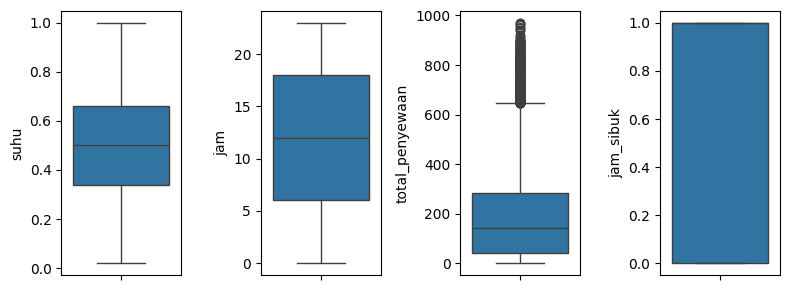

In [54]:
numerik = df_clean.select_dtypes(include='number')

plt.figure(figsize=(8,3))

posisi = 1
for setiap_kolom in numerik.columns:
    plt.subplot(1,4,posisi)
    sns.boxplot(y=df_clean[setiap_kolom])
    posisi +=1
    plt.tight_layout()


melalui visualisasi tersebut, tampak bahwa yang memiliki outlier adalah data `total_penyewaan`

berikut adalah visualisai setelah dilakukan penghapusan outlier dengan pertimbangan IQR. Adapun data yang dihapus adalah sebesar 338 baris

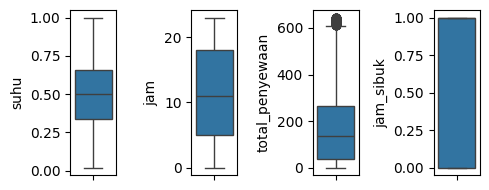

In [55]:
numerik = df_clean_without_outlier.select_dtypes(include='number')

plt.figure(figsize=(5,2))

posisi = 1
for setiap_kolom in numerik.columns:
    plt.subplot(1,4,posisi)
    sns.boxplot(y=df_clean_without_outlier[setiap_kolom])
    posisi +=1
    plt.tight_layout()


In [56]:
x_no_outlier = df_clean_without_outlier.drop(columns='total_penyewaan')
y_no_outlier = df_clean_without_outlier['total_penyewaan']

x_train_no_outlier,x_test_no_outlier,y_train_no_outlier,y_test_no_outlier = train_test_split(
    x_no_outlier,
    y_no_outlier,
    test_size= 0.2,
    random_state= 2024
)
x_train_no_outlier.shape,x_test_no_outlier.shape,y_train_no_outlier.shape,y_test_no_outlier.shape 


((9452, 9), (2364, 9), (9452,), (2364,))

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

# Base model/algoritma yang digunakan
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=2024)
knn = KNeighborsRegressor(n_neighbors=5)
rf = RandomForestRegressor(random_state=2024)
xgb = XGBRegressor(random_state=2024)


# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [lr, dt, knn, rf, xgb]

# Menyimpan skor
score_mae, score_mse, score_rmse, score_mape, score_r2 = [], [], [], [], []

nilai_mean_mae = []
nilai_mean_mse= []
nilai_mean_rmse = []
nilai_mean_mape= []
nilai_mean_r2 = []

test_mae, test_mse, test_rmse, test_mape, test_r2 = [], [], [], [], []

# Loop untuk setiap model
for model in models:
    crossval = KFold(n_splits=5, shuffle=True, random_state=2024)
    
    pipeline = Pipeline([
        ('transformer',transformer),
        ('scaler',scaler),
        ('model',model)
    ])
    
    # Cross-Validation MAE
    score_cv_mae = cross_val_score(pipeline, x_train_no_outlier,y_train_no_outlier, cv=crossval, scoring='neg_mean_absolute_error', error_score='raise')
    score_mae.append(score_cv_mae)
    nilai_mean_mae.append(-score_cv_mae.mean())

    # Cross-Validation MSE
    score_cv_mse = cross_val_score(pipeline, x_train_no_outlier,y_train_no_outlier, cv=crossval, scoring='neg_mean_squared_error', error_score='raise')
    score_mse.append(score_cv_mse)
    nilai_mean_mse.append(-score_cv_mse.mean())

    # Cross-Validation RMSE
    score_cv_rmse = cross_val_score(pipeline, x_train_no_outlier,y_train_no_outlier, cv=crossval, scoring='neg_root_mean_squared_error', error_score='raise')
    score_rmse.append(score_cv_rmse)
    nilai_mean_rmse.append(-score_cv_rmse.mean())

    # Cross-Validation MAPE
    score_cv_mape = cross_val_score(pipeline,x_train_no_outlier,y_train_no_outlier, cv=crossval, scoring='neg_mean_absolute_percentage_error', error_score='raise')
    score_mape.append(score_cv_mape)
    nilai_mean_mape.append(-score_cv_mape.mean())
    
    # Cross-Validation R-Squared
    score_cv_r2 = cross_val_score(pipeline, x_train_no_outlier,y_train_no_outlier ,cv=crossval, scoring='r2', error_score='raise')
    score_r2.append(score_cv_r2)
    nilai_mean_r2.append(score_cv_r2.mean())
    
    # Melakukan fit dan prediksi pada data test
    pipeline.fit(x_train_no_outlier,y_train_no_outlier)
    y_pred_test_no_outlier = pipeline.predict(x_test_no_outlier)
    
    # Menghitung MAE, MSE, RMSE, MAPE, dan R² pada test data
    test_mae.append(mean_absolute_error(y_test_no_outlier, y_pred_test_no_outlier))
    test_mse.append(mean_squared_error(y_test_no_outlier, y_pred_test_no_outlier))
    test_rmse.append(np.sqrt(mean_squared_error(y_test_no_outlier, y_pred_test_no_outlier)))
    test_mape.append(mean_absolute_percentage_error(y_test_no_outlier, y_pred_test_no_outlier))
    test_r2.append(r2_score(y_test_no_outlier, y_pred_test_no_outlier))

# Evaluasi hasil
hapus_outlier = pd.DataFrame({
    'Model': ['Linear Regression', 'DecisionTree Regression', 'KNN Regression', 'RandomForest Regression', 'XGBoost Regression'],
    
    'Mean_MAE': nilai_mean_mae,
    'Test_MAE': test_mae,
    
    'Mean_MSE': nilai_mean_mse,
    'Test_MSE': test_mse,
    
    'Mean_RMSE': nilai_mean_rmse,
    'Test_RMSE': test_rmse,
    
    'Mean_MAPE': nilai_mean_mape,
    'Test_MAPE': test_mape,
    
    'Mean_R-Squared': nilai_mean_r2,
    'Test_R-Squared': test_r2,
})

hapus_outlier


,Model,Mean_MAE,Test_MAE,Mean_MSE,Test_MSE,Mean_RMSE,Test_RMSE,Mean_MAPE,Test_MAPE,Mean_R-Squared,Test_R-Squared
0,Linear Regression,84.880813,82.615035,11913.845750,11490.012557,109.139058,107.191476,2.669247,2.418402,0.506567,0.538183
1,DecisionTree Regression,40.682437,39.306472,4894.446584,4607.493502,69.950920,67.878520,0.441081,0.428349,0.797336,0.814812
2,KNN Regression,50.271449,47.120558,5927.440513,5152.307327,76.971455,71.779575,0.692231,0.623382,0.754370,0.792914
3,RandomForest Regression,31.579482,29.559520,2827.288087,2380.242938,53.161647,48.787733,0.385516,0.360880,0.882777,0.904331
4,XGBoost Regression,29.806119,27.854862,2380.644306,2061.069822,48.762666,45.399007,0.456904,0.441999,0.901388,0.917160


In [58]:
hapus_outlier_non_tf =hapus_outlier.copy()
hapus_outlier_non_tf = hapus_outlier_non_tf[['Model','Mean_RMSE', 'Test_RMSE']]
hapus_outlier_non_tf.rename(columns={'Mean_RMSE':'train_score_mean',
                          'Test_RMSE': 'test_score'},inplace=True)
hapus_outlier_non_tf


,Model,train_score_mean,test_score
0,Linear Regression,109.139058,107.191476
1,DecisionTree Regression,69.950920,67.878520
2,KNN Regression,76.971455,71.779575
3,RandomForest Regression,53.161647,48.787733
4,XGBoost Regression,48.762666,45.399007


## Hasil Eksperimen

In [59]:
rule_based['eksperimen'] = 'Rule Based'
BM_with_tf['eksperimen'] = 'Based Model Non Transformasi'
BM_non_tf ['eksperimen'] = 'Based Model with Transformasi'
hapus_outlier_non_tf['eksperimen'] = 'Hapus_outlier'

#penggabungan semua score
gabungan = pd.concat([rule_based,BM_with_tf,BM_non_tf,hapus_outlier_non_tf],axis=0)
gabungan = gabungan.set_index(['eksperimen','Model'])

# highlight
gabungan.style.highlight_min(subset = ['train_score_mean','test_score'], color='lightgreen',axis=0)



**Pengamatan**

XGBoost Regression adalah model terbaik di semua eksperimen, baik tanpa transformasi, dengan transformasi, ataupun setelah menghapus outlier.
`Eksperimen Hapus Outlier` menghasilkan RMSE terbaik untuk tiap score train dan test adalah yang dihighlight hijau, sehingga menangani outlier dengan benar dapat meningkatkan prediksi secara signifikan.

## Final Model

Pada final model, kita akan menggunakan model terbaik XGBoost dengan variabel berupa x_train_no_outlier dan y_train_no_outlier.

In [60]:
final_model = gabungan.reset_index()
final_model = final_model[(final_model['eksperimen'] == 'Hapus_outlier') & (final_model['Model'] == 'XGBoost Regression')]
display('Model terbaik')
display(final_model) 

before_tuning = final_model[['eksperimen','train_score_mean', 'test_score']]
before_tuning.loc[before_tuning['eksperimen'] == 'Hapus_outlier', 'eksperimen'] = 'before_tuning'
display('Score before tuning')
display(before_tuning)


'Model terbaik'

,eksperimen,Model,train_score_mean,test_score
15,Hapus_outlier,XGBoost Regression,48.762666,45.399007


'Score before tuning'

,eksperimen,train_score_mean,test_score
15,before_tuning,48.762666,45.399007


## Hyperparameter tuning

Kita akan melakukan tuning pada model terbaik yaitu XGBoost regressor menggunakan `Random search` (kombinasi parameter secara acak) dan `Grid search` (kombinasi parameter secara optimal) untuk meningkatkan performa model.

Note: Hyperparameter tuning adalah proses memilih nilai optimal dari hyperparameter dalam model machine learning.

### Randomized search cv

`Random search` (kombinasi parameter secara acak)

In [61]:
# Import Library
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

# model yang akan dituning 
pipelineXGB = Pipeline([
    ('transformer', transformer),  
    ('model', xgb) 
])

# Mengatur parameter untuk XGBRegressor 
param_XGB = {
    'model__max_depth': list(np.arange(1, 11)),
    'model__learning_rate': list(np.arange(1, 100)/100),
    'model__n_estimators': list(np.arange(100, 201)),
    'model__colsample_bytree': [0.5, 0.7, 1.0]
}

# Menggunakan RandomizedSearchCV untuk hyperparameter tuning
randomized = RandomizedSearchCV(
    estimator=pipelineXGB,
    param_distributions=param_XGB,
    scoring='neg_root_mean_squared_error',
    cv=crossval,
    random_state=2024,
    n_iter=20
)

# Fit model dengan data training
randomized.fit(x_train_no_outlier,y_train_no_outlier)


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=2024, shuffle=True),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['ket_libur',
                                                                                'musim']),
                                                                              ('ordinal',
                                                                               OrdinalEncoder(),
                                                                               ['day',
                                                                                'month',
                                                                                'year']),
                                                                              ('minmax',
                                                                               MinMaxScaler(),
                                                                               ['suhu',
                                                                                'jam',
                                                                                'jam_sibuk',
                                                                                'akhir '
                                                                                'pekan'])])...
                                                                 0.11, 0.12,
                                                                 0.13, 0.14,
                                                                 0.15, 0.16,
                                                                 0.17, 0.18,
                                                                 0.19, 0.2,
                                                                 0.21, 0.22,
                                                                 0.23, 0.24,
                                                                 0.25, 0.26,
                                                                 0.27, 0.28,
                                                                 0.29, 0.3, ...],
                                        'model__max_depth': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'model__n_estimators': [100, 101, 102,
                                                                103, 104, 105,
                                                                106, 107, 108,
                                                                109, 110, 111,
                                                                112, 113, 114,
                                                                115, 116, 117,
                                                                118, 119, 120,
                                                                121, 122, 123,
                                                                124, 125, 126,
                                                                127, 128, 129, ...]},
                   random_state=2024, scoring='neg_root_mean_squared_error')

In [62]:
print("Best score (neg_root_mean_squared_error):", -randomized.best_score_)


Best score (neg_root_mean_squared_error): 50.410167301690976


#### Predict test set Random search

In [63]:
# Define model terhadap estimator terbaik
xgb_tuning = randomized.best_estimator_

# Fitting model
xgb_tuning.fit(x_train_no_outlier, y_train_no_outlier)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(x_test_no_outlier)

# Simpan nilai metrics RMSE setelah tuning
rmse_xgb_tuning_RS = np.sqrt(mean_squared_error(y_test_no_outlier, y_pred_xgb_tuning))
rmse_xgb_tuning_RS



48.69656309022174

In [64]:
# Create a DataFrame to store the metrics
RS_tuning_xgb = pd.DataFrame({
    'eksperimen' :'Randomized search cv',
    'train_score_mean': [-randomized.best_score_],
    'test_score': [rmse_xgb_tuning_RS]})

# Display the DataFrame
RS_tuning_xgb


,eksperimen,train_score_mean,test_score
0,Randomized search cv,50.410167,48.696563


### Grid Search CV

`Grid search` (kombinasi parameter secara optimal) 

In [65]:
# Import Library
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
import numpy as np

# Model yang akan dituning 
pipelineXGB = Pipeline([
    ('transformer', transformer), 
    ('model', XGBRegressor(random_state=2024))  # Menggunakan XGBRegressor di pipeline
])

# Mengatur parameter untuk XGBRegressor 
param_XGB = {
    'model__max_depth': list(np.arange(1, 11)),  # max_depth antara 1 hingga 10
    'model__learning_rate': list(np.linspace(0.01, 0.2, 10)),  # learning_rate dari 0.01 hingga 0.2
    'model__n_estimators': list(np.arange(100, 201, 50)),  # n_estimators antara 100 hingga 200
    'model__colsample_bytree': [0.5, 0.7, 1.0]  # Sampling fitur
}

# Menggunakan GridSearchCV untuk hyperparameter tuning
gridsearch = GridSearchCV(
    estimator=pipelineXGB,
    param_grid=param_XGB,
    scoring='neg_root_mean_squared_error',  # Menggunakan RMSE untuk regresi
    cv=5,  # Cross-validation 5 fold
    n_jobs=-1,  # Menggunakan semua core CPU yang tersedia
    verbose=3  # Menampilkan progres saat pencarian grid dilakukan
)

# Fit model dengan data training
gridsearch.fit(x_train_no_outlier, y_train_no_outlier)

# Melihat parameter terbaik yang ditemukan oleh GridSearch
print("Best Parameters: ", gridsearch.best_params_)
print("Best Score: ", -gridsearch.best_score_)


Fitting 5 folds for each of 900 candidates, totalling 4500 fits
Best Parameters:  {'model__colsample_bytree': 0.7, 'model__learning_rate': 0.07333333333333333, 'model__max_depth': 8, 'model__n_estimators': 200}
Best Score:  47.692615098083124


In [66]:
# Define model terhadap estimator terbaik
xgb_tuning = gridsearch.best_estimator_

# Fitting model
xgb_tuning.fit(x_train_no_outlier, y_train_no_outlier)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(x_test_no_outlier)

# Simpan nilai metrics RMSE, R Squared & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test_no_outlier, y_pred_xgb_tuning))

# Create a DataFrame to store the metrics
rmse_xgb_tuning_GS = rmse_xgb_tuning
rmse_xgb_tuning_GS



45.59763897852851

In [67]:
# Create a DataFrame to store the metrics
GS_tuning_xgb = pd.DataFrame({
    'eksperimen' :'Grid search cv',
    'train_score_mean': [-gridsearch.best_score_],
    'test_score': [rmse_xgb_tuning_GS]})

# Display the DataFrame
GS_tuning_xgb


,eksperimen,train_score_mean,test_score
0,Grid search cv,47.692615,45.597639


## Penjelasan Model

In [68]:
hasil_tuning = pd.concat([before_tuning,RS_tuning_xgb,GS_tuning_xgb],axis=0).set_index('eksperimen')
hasil_tuning.style.highlight_min(subset = ['train_score_mean','test_score'], color='lightgreen',axis=0)


,train_score_mean,test_score
eksperimen,,
before_tuning,48.762666,45.399007
Randomized search cv,50.410167,48.696563
Grid search cv,47.692615,45.597639


Jika dilihat dari hasil test_score, yang paling kecil adalah hasil dari Grid search cv sehingga hasil tuning dengan **Grid Search menghasilkan performa yang lebih baik** daripada Randomized search cv maupun before_tuning untuk masing-masing data train dan test total penyewa adalah 47.69 dan 45.59.

# Final Model Interpretation

In [69]:
best_model_xgb = XGBRegressor(
    colsample_bytree=0.7,
    learning_rate=0.07333333333333333,
    max_depth=8,
    n_estimators=200,
    random_state = 2024)

final_model = Pipeline([
    ('transformer',transformer),
    ('model',best_model_xgb)
])

final_model.fit(x_train_no_outlier,y_train_no_outlier)


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['ket_libur', 'musim']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['day', 'month', 'year']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['suhu', 'jam', 'jam_sibuk',
                                                   'akhir pekan'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylev...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None,
                              learning_rate=0.07333333333333333, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=8, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, random_state=2024, ...))])

In [70]:
y_pred_no_outlier = final_model.predict(x_test_no_outlier)
score = np.sqrt(mean_squared_error(y_test_no_outlier,y_pred_no_outlier))
score


45.59763897852851

# **Best Model (XGBoost)**

Model terbaik, XGBoost didasarkan pada teknik boosting, yang merupakan metode ensemble learning di mana beberapa model sederhana (biasanya decision tree) dikombinasikan untuk membentuk model yang lebih kuat.

- Boosting: Teknik di mana model dibangun secara berurutan, dan setiap model baru mencoba memperbaiki kesalahan yang dibuat oleh model sebelumnya
- Gradient Boosting: Menggunakan pendekatan gradient descent untuk meminimalkan kesalahan prediksi dari model sebelumnya. Setiap model baru yang ditambahkan dalam boosting berusaha untuk memprediksi kesalahan (residual) dari model sebelumnya, sehingga secara bertahap kesalahan model berkurang.

XGBoost menjadi model yang sangat kuat karena gabungan dari optimisasi gradient boosting yang canggih, regulasi yang kuat, dan kemampuan penanganan missing data. 

[xgboost-HowItWorks](https://docs.aws.amazon.com/id_id/sagemaker/latest/dg/xgboost-HowItWorks.html)

In [71]:
best_model = hasil_tuning.reset_index()
best_model = best_model[best_model['eksperimen']=='Grid search cv'][['train_score_mean', 'test_score','eksperimen']]
best_model


,train_score_mean,test_score,eksperimen
2,47.692615,45.597639,Grid search cv


## Feature Importance

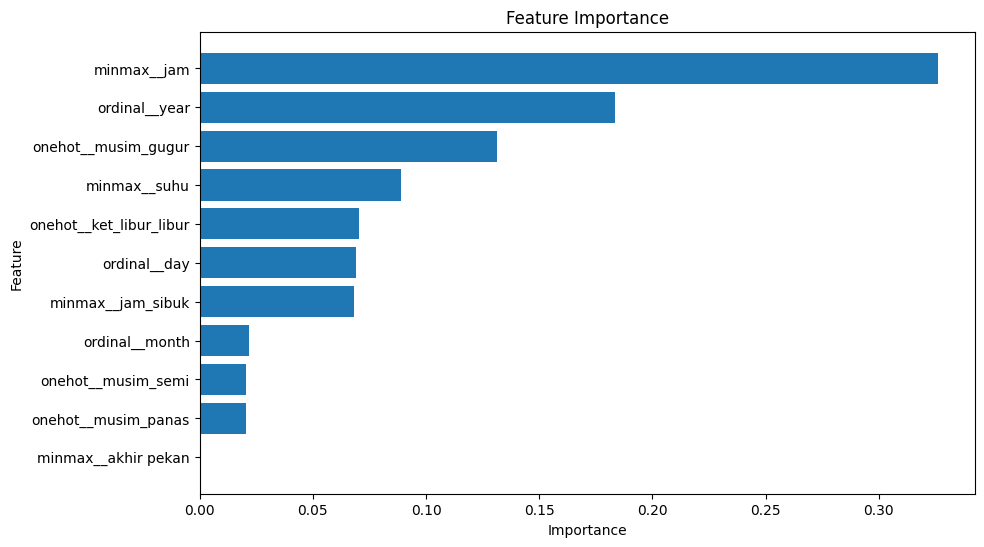

,Feature,Importance
8,minmax__jam,0.326004
6,ordinal__year,0.183662
1,onehot__musim_gugur,0.131491
7,minmax__suhu,0.089005
0,onehot__ket_libur_libur,0.070394
4,ordinal__day,0.069092
9,minmax__jam_sibuk,0.067967
5,ordinal__month,0.021841
3,onehot__musim_semi,0.020291
2,onehot__musim_panas,0.020254


In [72]:
feature_importance = pipeline.named_steps['model'].feature_importances_
features = pipeline.named_steps['transformer'].get_feature_names_out()

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  
plt.show()
display(importance_df)


Hasil pemodelan menunjukkan bahwa jam, year, dan musim menjadi fitur yang paling berpengaruh terhadap prediksi jumlah penyewa.

**Pengamatan**

Fitur yang memiliki `pengaruh yang sangat signifikan` terhadap prediksi model adalah `jam`,`year dan musim`.sedangkan fitur lainnya memiliki kontribusi kecil juga berdampak positif. Feature importance menunjukkan adanya penambahan penyewa (tren positif) dari tahun ke tahun, tiap musim gugur, pada hari dan suhu tertentu.

## Visualisasi Prediksi

In [73]:
residual = y_test_no_outlier - y_pred_no_outlier

dfresidual = pd.DataFrame({'ypred': y_pred_no_outlier,
                           'ytest' : y_test_no_outlier,
                           'residual': residual})
dfresidual


,ypred,ytest,residual
1350,196.273972,192,-4.273972
664,426.040070,500,73.959930
1382,324.395477,407,82.604523
3833,11.922027,11,-0.922027
11643,428.554169,531,102.445831
...,...,...,...
6480,120.659111,14,-106.659111
7082,36.575512,47,10.424488
2009,142.665955,172,29.334045
5051,25.097889,18,-7.097889


Berikut gambaran jika divisualisasikan

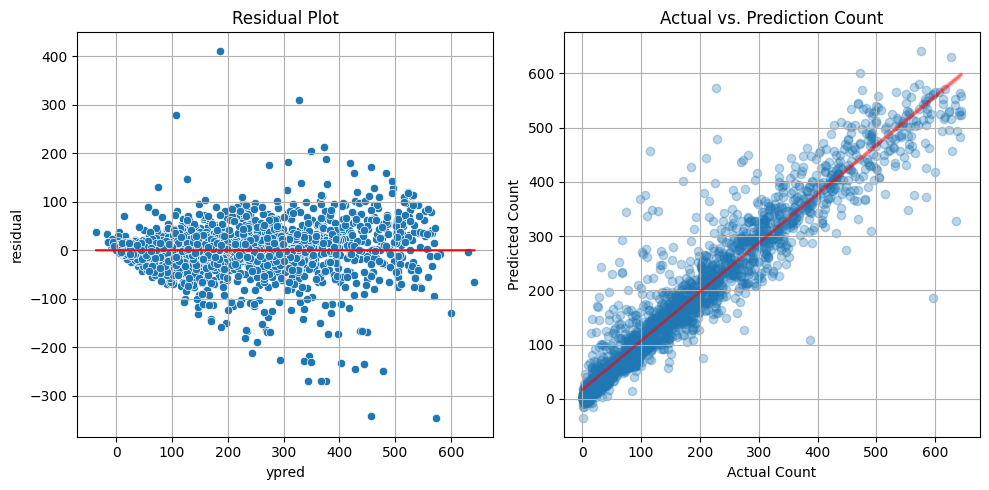

In [74]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,2)
sns.regplot(x =y_test_no_outlier,
            y = y_pred_no_outlier,
            scatter_kws={ 'alpha': 0.3}, line_kws = {'color': 'red', 'alpha': 0.5}).set(title='Actual vs. Prediction Count', 
                                               xlabel='Actual Count', 
                                               ylabel='Predicted Count')
plt.grid() 
            
plt.subplot(1,2,1)
sns.scatterplot(data=dfresidual, x='ypred', y='residual')
sns.lineplot(data=dfresidual, x='ypred', y=0, color='red')
plt.title('Residual Plot')
plt.tight_layout()
plt.grid()

plt.show()



Residual Plot (kiri):

Residual adalah selisih antara nilai aktual dan nilai prediksi dari model.
Grafik ini menunjukkan residual terhadap prediksi, di mana garis merah adalah garis nol yang merepresentasikan tidak adanya kesalahan prediksi.
Interpretasi:
>- Sebagian besar residual berada di sekitar garis nol, yang berarti model memiliki performa yang baik karena kesalahan prediksinya kecil.
Namun, ada beberapa outlier atau kesalahan besar yang terlihat (di atas dan di bawah residual = ±200), yang menunjukkan adanya data yang tidak diprediksi dengan baik oleh model.
>- Pola acak pada residual menunjukkan bahwa model tidak mengalami heteroskedastisitas (penyebaran kesalahan yang bervariasi) atau pola sistematis tertentu, yang menunjukkan bahwa asumsi homoskedastisitas terpenuhi dan model cukup baik dalam memprediksi.

Aktual vs. Prediksi (kanan):

Grafik ini membandingkan nilai aktual dengan nilai prediksi yang dihasilkan oleh model.
Interpretasi:
>- Titik-titik yang mendekati garis diagonal menunjukkan prediksi yang sangat akurat.
Semakin banyak titik yang berada di dekat garis diagonal ini, semakin baik model dalam memprediksi nilai sebenarnya.
>- Pada grafik ini, sebagian besar titik berada di sekitar garis diagonal, yang mengindikasikan bahwa model cukup baik dalam melakukan prediksi. Namun, terdapat beberapa deviasi di luar garis yang menunjukkan adanya kesalahan prediksi pada beberapa titik.

*Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting

Kita akan menghitung rmse pada rentang tertentu dengan menggunakan nilai residual

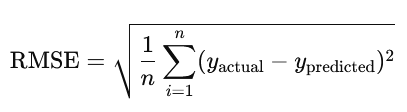

In [75]:
rmse = np.sqrt(np.mean(residual ** 2))
print(f"RMSE keseluruhan: {rmse}")


RMSE keseluruhan: 45.59763897852851


## RMSE pada rentang tertentu

In [76]:
# Fungsi untuk menghitung RMSE dalam rentang tertentu
def calculate_rmse_by_range(y_pred, residual, step=50, max_value=600):
    rmse_values = {}
    
    for start in range(0, max_value, step):
        end = start + step
        # Filter ypred dan residual berdasarkan rentang saat ini
        mask = (y_pred >= start) & (y_pred < end)
        residual_filtered = residual[mask]
        
        # Hitung RMSE
        if len(residual_filtered) > 0:
            rmse = np.sqrt(np.mean(residual_filtered ** 2))
        else:
            rmse = None  # Jika tidak ada data dalam rentang ini
        
        rmse_values[f"RMSE for {start} - {end}"] = rmse
    
    return rmse_values

y_pred =y_pred_no_outlier

np.random.seed(2024)

# Memanggil fungsi untuk menampilkan RMSE
rmse_by_range = calculate_rmse_by_range(y_pred, residual, step=50, max_value=600)
rmse_by_range


{'RMSE for 0 - 50': 9.463995080018098,
 'RMSE for 50 - 100': 22.657965837238002,
 'RMSE for 100 - 150': 37.776879524499584,
 'RMSE for 150 - 200': 48.3225656875271,
 'RMSE for 200 - 250': 50.33814321035417,
 'RMSE for 250 - 300': 54.59158845791446,
 'RMSE for 300 - 350': 70.9802639841599,
 'RMSE for 350 - 400': 71.7589891967449,
 'RMSE for 400 - 450': 79.15453895837042,
 'RMSE for 450 - 500': 82.97055388198952,
 'RMSE for 500 - 550': 60.54364599265521,
 'RMSE for 550 - 600': 91.26343198814172}

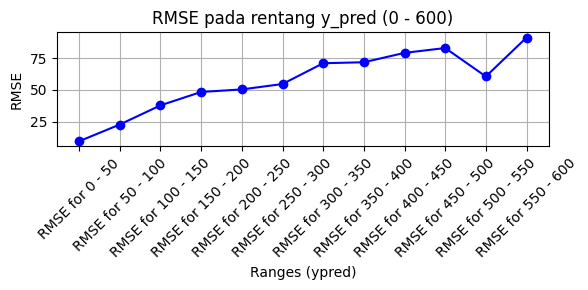

In [77]:
# Plotting the RMSE values
ranges = list(rmse_by_range.keys())
rmse_values = list(rmse_by_range.values())

plt.figure(figsize=(6,3))
plt.plot(ranges, rmse_values, marker='o', linestyle='-', color='b')
plt.xlabel('Ranges (ypred)')
plt.ylabel('RMSE')
plt.title('RMSE pada rentang y_pred (0 - 600)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


**Pengamatan**

Ternyata model memberikan akurasi yang baik pada rentang 0-200 dengan nilai RMSE <50 atau pada rentang 9 - 48. Akurasi model secara konsisten menurun untuk analisis prediktif pada rentang >200.

# Limitasi

Model tampak bekerja lebih baik pada rentang prediksi 50 - 200. Fitur yang baik menurut model menggunakan XGBoost adalah jam, year, musim, dan suhu. Data yang digunakan dalam analisa ini adalah tahun 2011 - 2012, sementara fitur lainnya dengan range data terbaik adalah sebagai berikut:

| Feature | Range |
|---|---|
| Jam | 06.00 - 10.00 & 15.00 - 18.00 |
| hari | Senin - Sabtu|
| Musim | Panas, semi, gugur|
| Suhu | > 0.7 atau >24.9°C|

## Estimasi Keuntungan

Jika diasumsikan perusahaan memproyeksikan jumlah sepeda yang di sewa menggunakan `rule based atau dengan logika sederhana` dan kemudian `dibandingkan` dengan menggunakan `machine learning` dengan model XGBoost, diperoleh hasil sebagai berikut:

In [78]:
rule_based = rule_based.drop(columns='Model')


In [79]:
estimasi_untung = pd.concat([rule_based,best_model],axis=0)
# Reset indeks DataFrame
estimasi_untung = estimasi_untung.reset_index(drop=True)
selisih_train_score_mean = estimasi_untung.loc[0, 'train_score_mean'] - estimasi_untung.loc[1, 'train_score_mean']
selisih_test_score = estimasi_untung.loc[0, 'test_score'] - estimasi_untung.loc[1, 'test_score']

untung_dollar_train = selisih_train_score_mean *3000
untung_dollar_test = selisih_test_score *3000

baris_selisih = pd.DataFrame({
    'train_score_mean': [selisih_train_score_mean],
    'test_score': [selisih_test_score],
    'eksperimen': ['Selisih']})

baris_untung_dl = pd.DataFrame({
'train_score_mean': [untung_dollar_train],
    'test_score': [untung_dollar_test],
    'eksperimen': ['untung ($)'],
})


estimasi_untung = pd.concat([estimasi_untung, baris_selisih,baris_untung_dl], ignore_index=True)
estimasi_untung


,train_score_mean,test_score,eksperimen
0,260.746817,263.760996,Rule Based
1,47.692615,45.597639,Grid search cv
2,213.054202,218.163357,Selisih
3,639162.605700,654490.069769,untung ($)


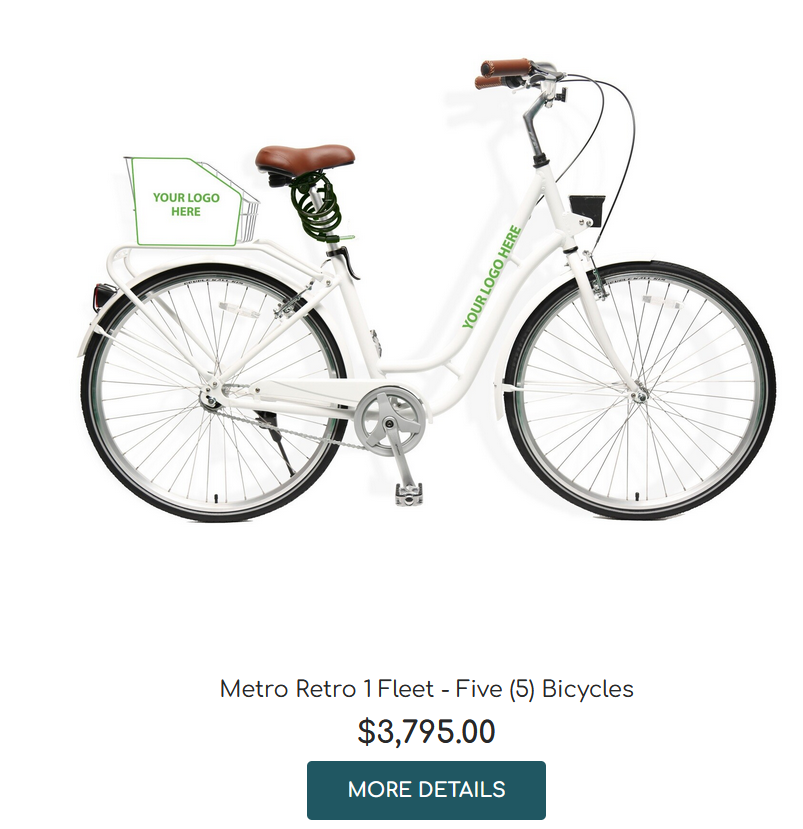

**Pengamatan**:
Penggunaan machine learning menggunakan XGBoost (tuning Grid search) secara drastis mengurangi _error_ atas prediksi penyewaan sepeda. Diasumsikan nilai sepeda adalah $3.000,00 (kurs Rp16.000) sehingga diperoleh keuntungan atar proyeksi senilai +/- $650 atau Rp10 milliar.

[referensi harga](https://www.businessanalystlearnings.com/business-matters/2022/2/3/how-much-does-it-cost-to-implement-a-bike-share-system-in-2022) 

# **Kesimpulan dan Rekomendasi**

## Kesimpulan

Dari eksperimen yang dilakukan dengan menggunakan XGBoost Regression, analisa jumlah penyewaan sepeda menunjukkan bahwa model XGBoost adalah yang terbaik di semua percobaan, baik tanpa transformasi, dengan transformasi, ataupun setelah menghapus outlier. Berikut poin-poin utama yang mendasari kesimpulan ini:
1. **Pengaruh Penghapusan Outlier**:
Eksperimen Hapus Outlier menghasilkan nilai RMSE terbaik untuk data train dan test. Menangani outlier dengan benar dapat meningkatkan akurasi prediksi secara signifikan.
Penghapusan outlier menunjukkan peningkatan kinerja model, menghasilkan nilai RMSE yang lebih rendah, yang menunjukkan bahwa model lebih baik dalam memprediksi penyewaan sepeda.

2. **Kekuatan Model XGBoost**:
XGBoost menggunakan teknik boosting, di mana model dibangun secara berurutan untuk memperbaiki kesalahan dari model sebelumnya, dengan memanfaatkan gradient descent untuk meminimalkan kesalahan prediksi secara bertahap. XGBoost secara konsisten memberikan score MSE, RMSE, MAPE, MAE, dan r-squared terbaik pada tiap experimen  

3. **Performa Model dengan Grid Search**:
Grid Search CV menghasilkan performa terbaik dengan RMSE 47.69 penyewa untuk train dan 45.59 penyewa untuk test, mengalahkan Randomized Search CV dan model sebelum tuning.
Hal ini menunjukkan bahwa tuning dengan Grid Search memberikan hasil yang lebih akurat dibandingkan metode tuning lainnya, terutama dalam hal meminimalkan kesalahan prediksi.

4. **Feature Importance**:
Fitur yang memiliki pengaruh paling signifikan terhadap prediksi adalah jam, year, dan musim, dengan kontribusi dari fitur lain seperti suhu yang juga berdampak positif dengan importance 0.13 - 0.32
Data menunjukkan adanya peningkatan tren penyewaan dari tahun ke tahun, serta peningkatan penyewaan pada waktu tertentu dalam sehari dan musim tertentu (seperti musim gugur).

5. **Rentang Prediksi Optimum**:
Rentang prediksi optimum terletak pada 0-200, dengan RMSE di bawah 50. Di rentang ini, model bekerja dengan sangat baik, sementara akurasi menurun untuk rentang di atas 200.
Fitur seperti jam, tahun, musim, dan suhu memberikan kontribusi yang signifikan terhadap prediksi model, dan model menunjukkan akurasi yang tinggi di rentang ini.

## Rekomendasi

- Gunakan XGBoost dengan Grid Search Tuning untuk meningkatkan akurasi prediksi penyewaan sepeda, terutama dalam mengatasi outlier.
Fokus pada rentang prediksi 0-200 untuk analisis prediktif yang lebih akurat, karena pada rentang ini RMSE lebih rendah dan prediksi lebih tepat.
- Pertimbangkan faktor jam, tahun, dan musim dalam membuat prediksi, karena faktor-faktor ini memiliki pengaruh yang signifikan pada jumlah penyewaan sepeda.
- Penghapusan outlier secara tepat akan membantu meningkatkan akurasi model lebih jauh dan mengurangi kesalahan prediksi.
- Potensi Keuntungan: Jika proyeksi penyewaan sepeda dilakukan dengan logika sederhana dan dibandingkan dengan prediksi menggunakan machine learning (XGBoost), penggunaan machine learning mampu mengurangi error prediksi, yang berdampak pada potensi keuntungan signifikan, diproyeksikan sekitar Rp10 miliar jika diasumsikan nilai sepeda sebesar $3.000 (kurs Rp16.000).

## Project Kedepannya

- Penghapusan dan Penanganan Outlier yang Lebih Mendetail
Identifikasi Lebih Lanjut Outlier: Lakukan analisa mendalam tentang karakteristik outlier dalam dataset. Mungkin perlu menggunakan metode deteksi outlier yang lebih canggih seperti Isolation Forest atau Local Outlier Factor.

- Pertimbangkan Fitur Lain yang Relevan
Explorasi Fitur Baru: Selain jam, tahun, dan musim, eksplorasi fitur baru seperti tingkat polusi udara atau lainnya yang mungkin berdampak pada jumlah penyewaan sepeda.

- Evaluasi Model pada Periode Waktu yang Lebih Lama
Data Tambahan: Jika memungkinkan, tambahkan lebih banyak data dari tahun-tahun lain untuk melihat bagaimana tren penyewaan sepeda berubah seiring waktu

- Pelatihan Model Secara Berkala
Update Model Secara Rutin: Lakukan retraining model secara berkala menggunakan data terbaru untuk memastikan bahwa model tetap relevan dengan tren penyewaan sepeda yang berubah.

# **Save Model**

In [80]:
import pickle

# save model
with open('model.pkl', 'wb') as f:
    pickle.dump(final_model, f)

# load model
with open('model.pkl', 'rb') as f:
    model_load = pickle.load(f)

# model sudah bisa untuk prediksi
model_load.predict(x)


array([248.01678 ,  21.120918,  96.65411 , ...,   9.587535,  53.9269  ,
       454.7688  ], dtype=float32)